#  🏦  **Банковский Кейс**

# **Раздел 1: Импорт библиотек и установка цветовых параметров**

In [ ]:
## Подключение необходимых библиотек
import pandas as pd                 # Библиотека для работы с данными в виде таблиц (DataFrame)
from IPython.display import display # Для отображения DataFrame в красивом формате таблицы (замена print) / display(dataframe)
from datetime import datetime       # Модуль для работы с датами и временем
import numpy as np                  # Библиотека для работы с массивами и числовыми данными

# Установка стиля для графиков
import seaborn as sns               # Библиотека для улучшенной визуализации данных на основе matplotlib
import matplotlib.pyplot as plt     # Библиотека для создания графиков и визуализаций

sns.set_style("whitegrid")          # Фон графика белый, График имеет сетку, Четкость

In [ ]:
# Подключение к Google Диску
from google.colab import drive
drive.mount('/content/drive')

# Путь к папке с промежуточными файлами на Google Диске
intermediate_path = '/content/drive/MyDrive/Курс Аналитик данных по Python от ZERO/PN14.Кейсы_в портфолио/Промежуточные/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


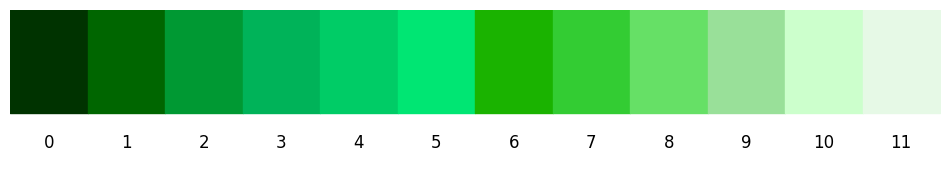

In [ ]:
# ЦВЕТОВАЯ ПОЛИТРА ГРАФИКОВ

contrast_colors = [
    '#003300', # 0 Темный лесной зеленый
    '#006600', # 1 Лесной зеленый
    '#009933', # 2 Яркий лесной зеленый
    '#00b359', # 3 Глубокий травяной зеленый
    '#00cc66', # 4 Яркий травяной зеленый
    '#00e673', # 5 Светло-яркий зеленый
    '#1ab300', # 6 Салатовый
    '#33cc33', # 7 Средний зеленый
    '#66e066', # 8 Светло-зеленый
    '#99e099', # 9 Мятный зеленый
    '#ccffcc', # 10 Очень светлый зеленый
    '#e6f9e6'  # 11 Бледно-зеленый
]

# Пример визуализации цветов
import matplotlib.pyplot as plt

# Устанавливаем размер фигуры
plt.figure(figsize=(12, 2))

# Цикл по каждому цвету для отрисовки квадратов с индексами
for i, color in enumerate(contrast_colors):
    plt.fill_between([i, i + 1], 0, 1, color=color)  # Рисуем цветной прямоугольник
    plt.text(i + 0.5, -0.3, str(i), ha='center', va='center', fontsize=12, color='black')  # Индекс под цветом

# Настройка осей
plt.xlim(0, len(contrast_colors))
plt.ylim(-0.5, 1)
plt.axis('off')  # Убираем оси

# Показ графика
plt.show()


# **Раздел 2: Обработка исходного файла для целей анализа**

Выявим и устраним:

1.  Загружаем и изучаем файл с данными
2.  Примененим стиль CamelCase (соединение слов через подчеркивание) используем для удобства работы с переменными.
3.  Формат даты если он имеет вид Объета (object), переведем в формат даты datetime;
4.  Проверим и устраним наличие пустых ячеек (значения) или пропусков;






##1 . Полчение источника информации


Данные взяты с сайта kaggle
[банковские транзакции](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

In [ ]:
# Загружаем данные файла bank_clients_transactions.csv
df_original = pd.read_csv('/content/drive/MyDrive/Курс Аналитик данных по Python от ZERO/PN14.Кейсы_в портфолио/bank_clients_transactions.csv')

# Проверим первые 5 строк для общего понимания структуры данных
df_original.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [ ]:
# Получим имена всех колонок в DataFrame
df_original.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [ ]:
# Получаем информацию о DataFrame
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


**Вывод:**
Некоторые столбцы требуют изменений для корректного анализа:
- CustomerDOB : Преобразуем в формате datetime, чтобы можно было учитывать возраст клиента.
- TransactionDate : Дата в столбце TransactionDate отображается как день/месяц/год. Преобразуем в формат datetime, который облегчит анализ по временным рамкам.
- TransactionTime : Время в столбце TransactionTime представлено в виде шестизначного числа - милисекунды. Преобразуем число в формате времени (часы:минуты:секунды) для удобного анализа.

##2 . Приведение столбцов к стилю snake_case

Приведение названия колонок к стилю snake_case — это единое преобразование название колонок для удобства последующего анализа, при использовании Python для переменных и функций

при котором:
- слова преобразуются в нижний регистр
- пробелы между слов заменяются на подчеркивания

Результат обработки сохраняем в новое название df_snake_case

Это позволяет избежать путаницы, и код остаётся чистым

In [ ]:
# Функция для автоматического преобразования названий колонок в snake_case (стиль написания)
def snake_case(s):
    return s.lower().replace(' ', '_')  # Преобразуем в нижний регистр и заменяем пробелы на подчеркивания

# Применим к каждому названию столбца, используем метод rename() с функцией lambda
df_snake_case = df_original.rename(columns=lambda x: snake_case(x))

# Проверим результат
print("Измененные названия колонок в стиле snake_case:")
print(df_snake_case.columns)

Измененные названия колонок в стиле snake_case:
Index(['transactionid', 'customerid', 'customerdob', 'custgender',
       'custlocation', 'custaccountbalance', 'transactiondate',
       'transactiontime', 'transactionamount_(inr)'],
      dtype='object')


##3 . Преобразование даты

преобразуем столбцы в формат даты и времени:

- CustomerDOB (Дата рождения клиента), преобразуем формат даты из d/m/y в yyyy-mm-dd.
- TransactionDate (Дата транзакции), преобразуем формат даты из d/m/y в yyyy-mm-dd.

**Примечание:** В столбце CustomerDOB кроме пустых значений хранятся некоректные даты типа 1/1/1800, которые при наличии сведений по этому клиенту в customerid заменим, а при отсутствии таковых - заменим как NaN и удалим.  

**ДАТА по столбцу CustomerDOB (дата рождения пользователя) и TransactionDate (дата транзакции)**
1.  Отобразим некорректные даты CustomerDOB
2.  Некоректные значения заменим как NaN (в числовом столбце значение отсутствует)
3.  Заменим некорректированные даты на основании имеющихся правильных дат CustomerID, остальные значения заменим как NaN (указывает на пропущенное или некорректное время)

**Обработка столбца CustomerDOB и TransactionDate**
- Все некорректированные даты (такие как текст, нераспознанные форматы, даты до 1900 года и первоначально некорректированные даты в том числе как «1/1/1800») будут представлены в customerdob виде NaN как пустые значения.
- Преобразование дат выполним с учетом веков 1900 и 2000
- Заполняем пропуски корректными значениями для каждого customerid, если такие значения существуют

Количество пропусков customerdob укажет на то, что у некоторых клиентов не осталось точной даты рождения, даже после маскировки на основе информации по идентификации клиента ( customerid). Это может означать, что у клиентов изначально отсутствовали правильные данные о дате рождения.

Такие строки будут далее удалены из анализируемого файла.

**- Отобразим ошибочные данные в столбце CustomerDOB**

Значания в столбце CustomerDOB имеют формат отличный от даты

In [ ]:
# Сохраняем исходные значения для анализа ошибок
df_copy = df_snake_case.copy()

# Преобразуем customerdob в формат даты с заданным форматом
df_copy['customerdob'] = pd.to_datetime(df_copy['customerdob'], format='%d/%m/%y', errors='coerce')

# Выводим примеры исходных значений customerdob, которые вызвали ошибки
sample_dob_errors = df_snake_case.loc[df_copy['customerdob'].isna(), 'customerdob'].head(10)
print("Примеры исходных значений customerdob до преобразования, которые вызвали ошибки:\n", sample_dob_errors)

# Выводим количество значений, которые вызвали ошибки
error_count = df_copy['customerdob'].isna().sum()
print("Количество значений customerdob, которые вызвали ошибки при преобразовании:", error_count)


Примеры исходных значений customerdob до преобразования, которые вызвали ошибки:
 16     1/1/1800
22     1/1/1800
28     1/1/1800
35     1/1/1800
151    1/1/1800
163    1/1/1800
176    1/1/1800
182    1/1/1800
190    1/1/1800
193    1/1/1800
Name: customerdob, dtype: object
Количество значений customerdob, которые вызвали ошибки при преобразовании: 60736


In [ ]:
# Функция для корректного преобразования дат с учетом 19 и 20 века / время выполнения 19 мин. 30 сек.
def parse_dob(date_str):
    # Проверяем на NaN и возвращаем NaN, если это так
    if pd.isna(date_str):
        return np.nan

    # Пробуем преобразовать строку в дату
    try:
        # Преобразуем дату, устанавливаем dayfirst=True для правильного порядка
        date = pd.to_datetime(date_str, format='%d/%m/%y', errors='coerce', dayfirst=True)

        # Если преобразование дало NaT, возвращаем NaN
        if pd.isna(date):
            return np.nan

        # Заменяем дату 01.01.1800 на NaN
        if date.year == 1800 and date.month == 1 and date.day == 1:
            return np.nan

        # Определяем, к какому веку относится год
        year_suffix = date.year % 100
        if year_suffix <= 24:
            date = date.replace(year=2000 + year_suffix)  # 2000-е года
        else:
            date = date.replace(year=1900 + year_suffix)  # 1900-е года

        # Возвращаем корректную дату
        return date
    except Exception as e:
        # В случае ошибки возвращаем NaN
        print(f"Error parsing date: {e}")
        return np.nan

# Применяем функцию ко всем значениям в столбцах с учетом новых названий
df_snake_case['customerdob'] = df_snake_case['customerdob'].apply(parse_dob)
df_snake_case['transactiondate'] = df_snake_case['transactiondate'].apply(parse_dob)

# Заполняем пропуски корректными значениями для каждого customerid
df_snake_case['customerdob'] = df_snake_case.groupby('customerid')['customerdob'].transform(lambda x: x.ffill().bfill())
df_snake_case['transactiondate'] = df_snake_case.groupby('customerid')['transactiondate'].transform(lambda x: x.ffill().bfill())

# Проверка на количество пустых значений
missing_values_after_dob = df_snake_case['customerdob'].isna().sum()
missing_values_after_transaction = df_snake_case['transactiondate'].isna().sum()
print("Количество пустых значений в customerdob после обработки:", missing_values_after_dob)
print("Количество пустых значений в transactiondate после обработки:", missing_values_after_transaction)

# Проверим результаты преобразования
print(df_snake_case[['customerdob', 'transactiondate']])

# Получаем начальную и конечную даты без времени
start_date = df_snake_case['transactiondate'].min().date()
end_date = df_snake_case['transactiondate'].max().date()

# Выводим начальную и конечную даты
print(f"Начальная дата: {start_date}")
print(f"Конечная дата: {end_date}")


Количество пустых значений в customerdob после обработки: 43887
Количество пустых значений в transactiondate после обработки: 0
        customerdob transactiondate
0        1994-01-10      2016-08-02
1        1957-04-04      2016-08-02
2        1996-11-26      2016-08-02
3        1973-09-14      2016-08-02
4        1988-03-24      2016-08-02
...             ...             ...
1048562  1990-04-08      2016-09-18
1048563  1992-02-20      2016-09-18
1048564  1989-05-18      2016-09-18
1048565  1978-08-30      2016-09-18
1048566  1984-03-05      2016-09-18

[1048567 rows x 2 columns]
Начальная дата: 2016-08-01
Конечная дата: 2016-10-21


In [ ]:
# Получаем информацию о DataFrame
df_snake_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   transactionid            1048567 non-null  object        
 1   customerid               1048567 non-null  object        
 2   customerdob              1004680 non-null  datetime64[ns]
 3   custgender               1047467 non-null  object        
 4   custlocation             1048416 non-null  object        
 5   custaccountbalance       1046198 non-null  float64       
 6   transactiondate          1048567 non-null  datetime64[ns]
 7   transactiontime          1048567 non-null  int64         
 8   transactionamount_(inr)  1048567 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 72.0+ MB


##4 . Поиск дублей и пропусков в данных и их обработка


In [ ]:
# Проверка на наличие пропущенных значений до обработки
missing_values = df_snake_case.isnull().sum()
print(missing_values[missing_values > 0])


customerdob           43887
custgender             1100
custlocation            151
custaccountbalance     2369
dtype: int64


In [ ]:
# Удаляем строки с отсутствующими датами рождения
df_snake_case = df_snake_case.dropna(subset=['customerdob']).copy()  # Создаем копию, чтобы избежать SettingWithCopyWarning

# Проверка на наличие пустых значений в custgender перед заполнением
if df_snake_case['custgender'].isnull().sum() > 0:
    most_common_gender = df_snake_case['custgender'].mode()[0]  # Находим самое частое значение
    df_snake_case['custgender'] = df_snake_case['custgender'].fillna(most_common_gender)  # Заполняем NaN
    print(f"Заполнено {df_snake_case['custgender'].isnull().sum()} пустых значений в столбце 'custgender'.")

# Проверка на наличие пустых значений в custlocation перед заполнением
if df_snake_case['custlocation'].isnull().sum() > 0:
    most_common_location = df_snake_case['custlocation'].mode()[0]  # Находим самое частое значение
    df_snake_case['custlocation'] = df_snake_case['custlocation'].fillna(most_common_location)  # Заполняем NaN
    print(f"Заполнено {df_snake_case['custlocation'].isnull().sum()} пустых значений в столбце 'custlocation'.")

# Проверка на наличие пустых значений в custaccountbalance перед заполнением
if df_snake_case['custaccountbalance'].isnull().sum() > 0:
    mean_account_balance = df_snake_case['custaccountbalance'].mean()  # Вычисляем среднее значение
    df_snake_case['custaccountbalance'] = df_snake_case['custaccountbalance'].fillna(mean_account_balance)  # Заполняем NaN
    print(f"Заполнено {df_snake_case['custaccountbalance'].isnull().sum()} пустых значений в столбце 'custaccountbalance'.")

# Удаляем оставшиеся NaN
df_snake_case = df_snake_case.dropna()

# Сбрасываем индекс
df_snake_case.reset_index(drop=True, inplace=True)

# Проверка типов данных
print("\nИнформация о df_snake_case перед сохранением:\n")
print(df_snake_case.info())

Заполнено 0 пустых значений в столбце 'custgender'.
Заполнено 0 пустых значений в столбце 'custlocation'.
Заполнено 0 пустых значений в столбце 'custaccountbalance'.

Информация о df_snake_case перед сохранением:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004680 entries, 0 to 1004679
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   transactionid            1004680 non-null  object        
 1   customerid               1004680 non-null  object        
 2   customerdob              1004680 non-null  datetime64[ns]
 3   custgender               1004680 non-null  object        
 4   custlocation             1004680 non-null  object        
 5   custaccountbalance       1004680 non-null  float64       
 6   transactiondate          1004680 non-null  datetime64[ns]
 7   transactiontime          1004680 non-null  int64         
 8   transactionamount_(inr)  1004680 non-nu

In [ ]:
# Проверка на дубликаты
duplicates = df_snake_case.duplicated()

# Вывод количества дубликатов
num_duplicates = duplicates.sum()
print(f"Количество дубликатов: {num_duplicates}")

# Если нужно, можно вывести сами дубликаты
if num_duplicates > 0:
    print("Дубликаты:")
    print(df_snake_case[duplicates])

Количество дубликатов: 0


##4 . Подход с промежуточным сохранением

- Сохраняем промежуточные результаты после обработки customerdob и transactiondate
- Загружаем сохраненные данные для дальнейшей работы

In [ ]:
# Переименование DataFrame
df_purified = df_snake_case.copy()  # Создаем копию df_snake_case и присваиваем её df_purified

# Укажите путь для сохранения
intermediate_path = '/content/drive/MyDrive/Курс Аналитик данных по Python от ZERO/PN14.Кейсы_в портфолио/Промежуточные/'

# Сохранение промежуточного файла в формате CSV
df_purified.to_csv(intermediate_path + 'df_purified_bank.csv', index=False)

# Проверка сохранения
print("Файл успешно сохранен:", intermediate_path + 'df_purified_bank.csv')

# Загрузка данных для дальнейшего анализа
df_purified = pd.read_csv(intermediate_path + 'df_purified_bank.csv', parse_dates=['customerdob', 'transactiondate'])


Файл успешно сохранен: /content/drive/MyDrive/Курс Аналитик данных по Python от ZERO/PN14.Кейсы_в портфолио/Промежуточные/df_purified_bank.csv


In [ ]:
# Выводим основную информацию о DataFrame, чтобы понять типы данных и количество непустых значений
df_purified.info()

# Основная статистика по количественным данным — среднее, медиана, стандартное отклонение и другие показатели
df_purified.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004680 entries, 0 to 1004679
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   transactionid            1004680 non-null  object        
 1   customerid               1004680 non-null  object        
 2   customerdob              1004680 non-null  datetime64[ns]
 3   custgender               1004680 non-null  object        
 4   custlocation             1004680 non-null  object        
 5   custaccountbalance       1004680 non-null  float64       
 6   transactiondate          1004680 non-null  datetime64[ns]
 7   transactiontime          1004680 non-null  int64         
 8   transactionamount_(inr)  1004680 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 69.0+ MB


,customerdob,custaccountbalance,transactiondate,transactiontime,transactionamount_(inr)
count,1004680,1.004680e+06,1004680,1.004680e+06,1.004680e+06
mean,1985-06-20 11:35:28.410240,1.086855e+05,2016-08-25 04:08:42.291674624,1.573169e+05,1.488801e+03
min,1925-05-06 00:00:00,0.000000e+00,2016-08-01 00:00:00,0.000000e+00,0.000000e+00
25%,1982-02-09 00:00:00,4.639920e+03,2016-08-12 00:00:00,1.241550e+05,1.550000e+02
50%,1987-09-13 00:00:00,1.630591e+04,2016-08-25 00:00:00,1.645030e+05,4.400000e+02
75%,1991-05-12 00:00:00,5.549787e+04,2016-09-06 00:00:00,2.001170e+05,1.150000e+03
max,2024-02-09 00:00:00,1.150355e+08,2016-10-21 00:00:00,2.359590e+05,1.560035e+06
std,NaN,8.260570e+05,NaN,5.126997e+04,6.259983e+03


**Вывод по результатам обработки файла:**

---
**Анализируемы файл:**
В анализируемом файле период данных представлен:
- Начальная дата: 2016-08-01
- Конечная дата: 2016-10-21

**Количество записей:**
- В исходном файле: **1,048,567**
- После обработки: **1,004,680**, что достаточно для анализа.

**Удалены и преобразованы пропущенные значения в колонках:**
- **CustomerDOB**: 43,887 значений
- **custgender**: 1,100 значений
- **custlocation**: 151 значение
- **custaccountbalance**: 2,369 значений

**Преобразование форматов:**
- **CustomerDOB (Дата рождения клиента)**: формат даты преобразован из `d/m/y` в `yyyy-mm-dd` для корректного анализа. Данные приведены к типу `datetime` (datetime64[ns]).
- **TransactionDate (Дата транзакции)**: аналогично, формат даты преобразован из `d/m/y` в `yyyy-mm-dd`, тип данных также изменен на `datetime` (datetime64[ns]).
- **TransactionTime (Время транзакции)**: миллисекунды преобразованы в стандартный формат времени `HH:MM:SS`.

**Дубликаты**: отсутствуют.

**Название** файла для дальнейшего анализа: **df_purified** (очищенный файл)

# **Раздел 3: Исследовательский анализ данных**

##1 . Уникальные пользователи

Такой анализ полезен для проверки уникальности значений, помогает обнаружить дубликаты.

Используем метод nunique(), который подсчитает количество уникальных значений в колонке "customerid".


In [ ]:
# Подсчитываем количество уникальных значений в столбце 'customerid'
unique_customers = df_purified['customerid'].nunique()

# Выводим результат
print(f"Количество уникальных пользователей: {unique_customers}")


Количество уникальных пользователей: 840889


##2 . Транзакции за анализируемый период

Чтобы узнать общее количество транзакций, можно просто подсчитать количество строк в анализируемом файле, так как каждая строка представляет отдельную транзакцию.

In [ ]:
# Подсчитываем количество строк в DataFrame, чтобы узнать общее количество транзакций
total_transactions = df_purified.shape[0]

# Выводим результат
print(f"Общее количество транзакций: {total_transactions}")


Общее количество транзакций: 1004680


##3 . Среднее количество транзакций на одного клиента

Чтобы вычислить среднее количество транзакций на одного клиента, нужно разделить общее количество транзакций на количество уникальных пользователей.

In [ ]:
# Total_transactions (Количество транзакций) и unique_customers (Количество клиентов) уже были вычислены ранее
average_transactions_per_customer = total_transactions / unique_customers

# Выводим результат
print(f"Среднее количество транзакций на одного клиента: {average_transactions_per_customer:.2f}")


Среднее количество транзакций на одного клиента: 1.19


##4 . Платежеспособность клиентов

Распределение и размах величин по значению "Остаток на р/счете" (CustAccountBalance) и "Сумма транзакции" (TransactionAmount)

Чтобы изучить распределение и размах значений в столбцах custaccountbalance и transactionamount, воспользуемся:
-  описательной статистикой,
- гистограммами
- "ящиками с усами" (box plot)

которые наглядно покажут, как распределены значения и где находятся выбросы.

- describe(): даст понимание о диапазоне значений и характере распределения (например, симметричное или скошенное).
- Гистограммы: помогут визуально определить форму распределения (например, нормальное, скошенное или равномерное) и помогут увидеть, как часто встречаются значения в разных диапазонах, и визуально оценить распределение.
- Box plot: покажет медиану, интерквартильный размах и выбросы.

###4.1 Изучение объема анализируемых данных

In [ ]:
# Проверка типов данных и первых нескольких строк
print(df_purified[['custaccountbalance', 'transactionamount_(inr)']].info())
print(df_purified[['custaccountbalance', 'transactionamount_(inr)']].head())

# Проверка на наличие пропусков
missing_balance = df_purified['custaccountbalance'].isna().sum()
missing_transaction = df_purified['transactionamount_(inr)'].isna().sum()

print(f"Количество пропусков в custaccountbalance: {missing_balance}")
print(f"Количество пропусков в transactionamount_(inr): {missing_transaction}")

# Проверка на уникальные значения и статистику
print(df_purified[['custaccountbalance', 'transactionamount_(inr)']].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004680 entries, 0 to 1004679
Data columns (total 2 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   custaccountbalance       1004680 non-null  float64
 1   transactionamount_(inr)  1004680 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB
None
   custaccountbalance  transactionamount_(inr)
0            17819.05                     25.0
1             2270.69                  27999.0
2            17874.44                    459.0
3           866503.21                   2060.0
4             6714.43                   1762.5
Количество пропусков в custaccountbalance: 0
Количество пропусков в transactionamount_(inr): 0
       custaccountbalance  transactionamount_(inr)
count        1.004680e+06             1.004680e+06
mean         1.086855e+05             1.488801e+03
std          8.260570e+05             6.259983e+03
min          0.000000e+00            

По полученной выше информации установлено, что анализируемые данные имеют достаточно большой набор данных с значительными колебаниями в значениях.

Средняя стоимость перевозки (1 488,801 индийской рупии) выше среднего значения (440,0 индийской рупии), что может свидетельствовать о нескольких очень крупных транзакциях.
Большое стандартное отклонение указывает на вариативность размеров транзакций.

**Вывод:** Большинство клиентов имеют сравнительно низкие балансы и небольшие траты, но при выборе присутствуют клиенты с очень крупными балансами и значительными объемами транзакций, что приводит к сильному разбросу данных.


Чтобы лучше отобразить данные на гистограммах вполним:

- Удалим выбросы: Установим фильтр, чтобы исключить слишком большие значения.
- Используем логарифмическую шкалу: Это поможет визуализировать данные, если они сильно варьируются.
- Проверим количество уникальных значений: Это может помочь понять, насколько разнообразны наши данные.

In [ ]:
# Убедимся, что столбцы с денежными значениями имеют правильный тип данных
df_purified['custaccountbalance'] = pd.to_numeric(df_purified['custaccountbalance'], errors='coerce')
df_purified['transactionamount_(inr)'] = pd.to_numeric(df_purified['transactionamount_(inr)'], errors='coerce')

# Удаление выбросов на уровне 99-го процентиля
q_high_balance = df_purified['custaccountbalance'].quantile(0.99)
q_high_transaction = df_purified['transactionamount_(inr)'].quantile(0.99)

# Создаем отфильтрованные DataFrame, в котором будут только те строки, где значения по обоим столбцам не превышают 99-й процентиль
df_filtered_balance = df_purified[df_purified['custaccountbalance'] <= q_high_balance]
df_filtered_transaction = df_purified[df_purified['transactionamount_(inr)'] <= q_high_transaction]


###4.2 Столбчатая гистограмма о платежах

График покажет, как часто встречаются платежи в выбранном наборе данных, с добавлением сглаженной кривой, чтобы лучше понимать распределение значений

Рассмотрим распределение и размах платежеспособности клиентов на графике гистограммы, применим логарифмическую шкалу в следствии значительных разросов данных в анализируемой таблице

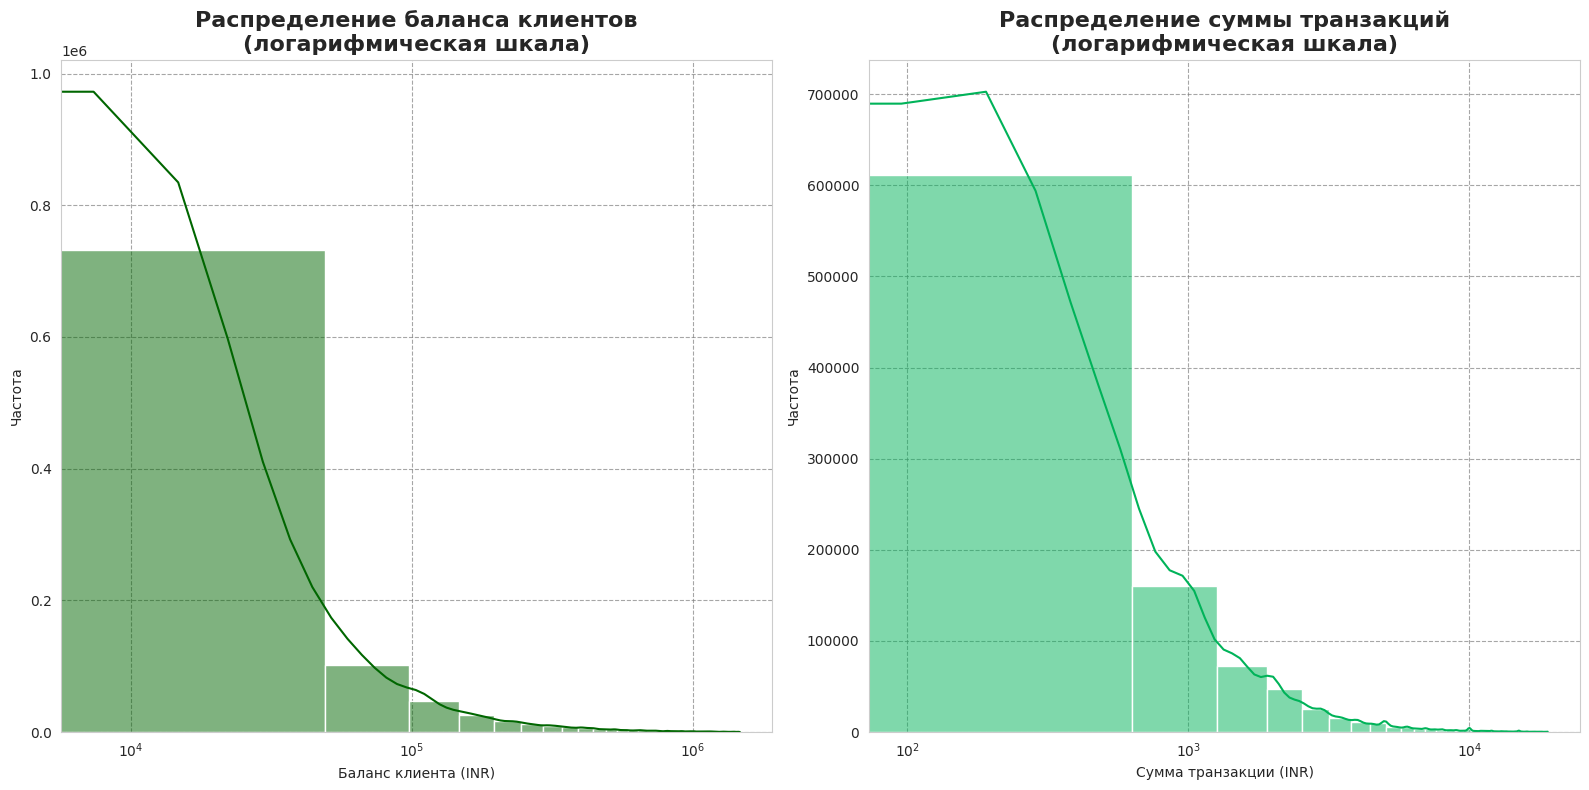

In [ ]:
# Настройка графиков
plt.figure(figsize=(16, 8))

# Гистограмма для баланса клиента с логарифмической шкалой
plt.subplot(1, 2, 1)
# Устаанавливааем 30 корзин /Чем больше значение, тем более детализированным будет распределение/
# Отображение кривой плотности распределения (KDE)
# Кривая KDE помогает увидеть общее распределение данных, сглаживая шум, который может возникнуть из-за разбиения на корзины
sns.histplot(df_filtered_balance['custaccountbalance'].dropna(), bins=30, kde=True,
             color=contrast_colors[1])  # Выбранный цвет для графика баланса

plt.xscale('log')  # Логарифмическая шкала
plt.title('Распределение баланса клиентов\n(логарифмическая шкала)', fontsize=16, fontweight='bold')
plt.xlabel('Баланс клиента (INR)')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', color='gray', alpha=0.7)

# Гистограмма для суммы транзакций с логарифмической шкалой
plt.subplot(1, 2, 2)
sns.histplot(df_filtered_transaction['transactionamount_(inr)'].dropna(), bins=30, kde=True,
             color=contrast_colors[3])  # Выбранный цвет для графика транзакций

plt.xscale('log')  # Логарифмическая шкала
plt.title('Распределение суммы транзакций\n(логарифмическая шкала)', fontsize=16, fontweight='bold')
plt.xlabel('Сумма транзакции (INR)')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', color='gray', alpha=0.7)

# Показать графики
plt.tight_layout()
plt.show()


**Вывод:**

1. Б**аланс клиентов:** Распределение сильно скошено влево, у большинства клиентов балансы относительно низкие (около 10^4 — 10^5 INR). Высокие балансы встречаются редко, когда происходит резкий спад частоты в правой части кадра.

2. **Сумма транзакций:** Аналогично, сумма суммы транзакций также сильно скошена влево, с пиком в зависимости от 10^2 — 10^3 INR. Большие количества транзакций встречаются редко, что также свидетельствует о состоянии небольших транзакций.

Большая часть клиентов осуществляет транзакции на небольшие суммы и поддерживает небольшие балансы, в то время как некоторые клиенты имеют высокие балансы и значительную транзакцию

###4.3 Скрипичный ключ для отображения платежеспособности клиентов

Рассмотрим данные о платежеспособности клиентов по их распределению и размаху в анализируемых данных, применим график "**Скрипичный ключ**"

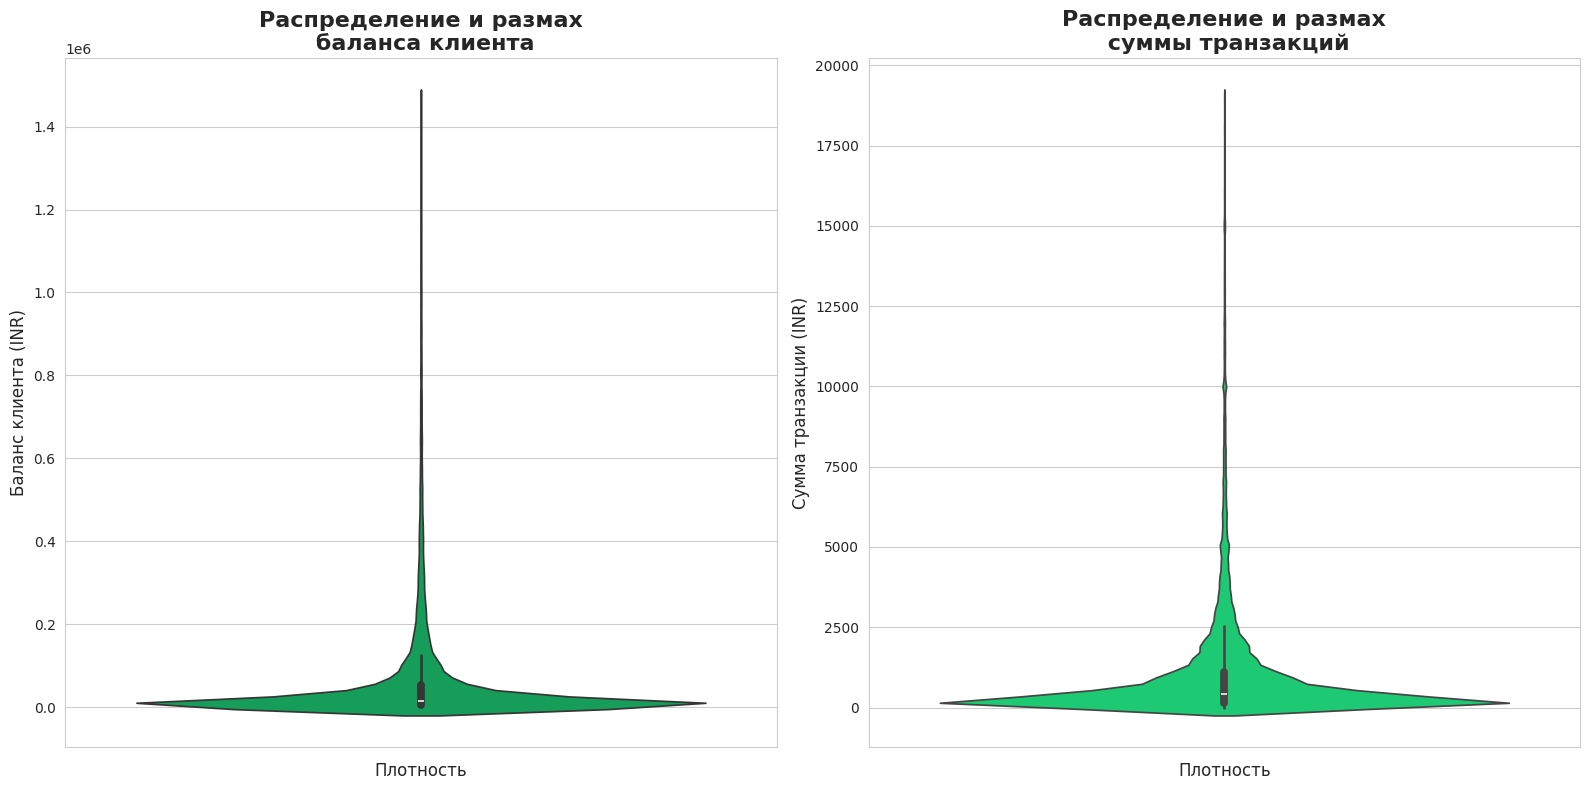

In [ ]:
# Настройка области для графиков
plt.figure(figsize=(16, 8))

# Скрипичный график для баланса клиента
plt.subplot(1, 2, 1)
sns.violinplot(y=df_filtered_balance['custaccountbalance'], color=contrast_colors[3])  # Лесной зеленый
plt.title('Распределение и размах\n баланса клиента', fontsize=16, fontweight='bold')
plt.ylabel('Баланс клиента (INR)', fontsize=12)
plt.xlabel('Плотность', fontsize=12)

# Скрипичный график для суммы транзакций
plt.subplot(1, 2, 2)
sns.violinplot(y=df_filtered_transaction['transactionamount_(inr)'], color=contrast_colors[5])  # Яркий лесной зеленый
plt.title('Распределение и размах\n суммы транзакций', fontsize=16, fontweight='bold')
plt.ylabel('Сумма транзакции (INR)', fontsize=12)
plt.xlabel('Плотность', fontsize=12)

# Показать графики
plt.tight_layout()
plt.show()


###4.4 "Ящик с усами" для отображения платежеспосбности

Отобразим данные о распределении платежеспособности клиентов на графике "**ящик с усами**"

In [ ]:
df_purified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004680 entries, 0 to 1004679
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   transactionid            1004680 non-null  object        
 1   customerid               1004680 non-null  object        
 2   customerdob              1004680 non-null  datetime64[ns]
 3   custgender               1004680 non-null  object        
 4   custlocation             1004680 non-null  object        
 5   custaccountbalance       1004680 non-null  float64       
 6   transactiondate          1004680 non-null  datetime64[ns]
 7   transactiontime          1004680 non-null  int64         
 8   transactionamount_(inr)  1004680 non-null  float64       
 9   transactiontime_minutes  1004680 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 76.7+ MB


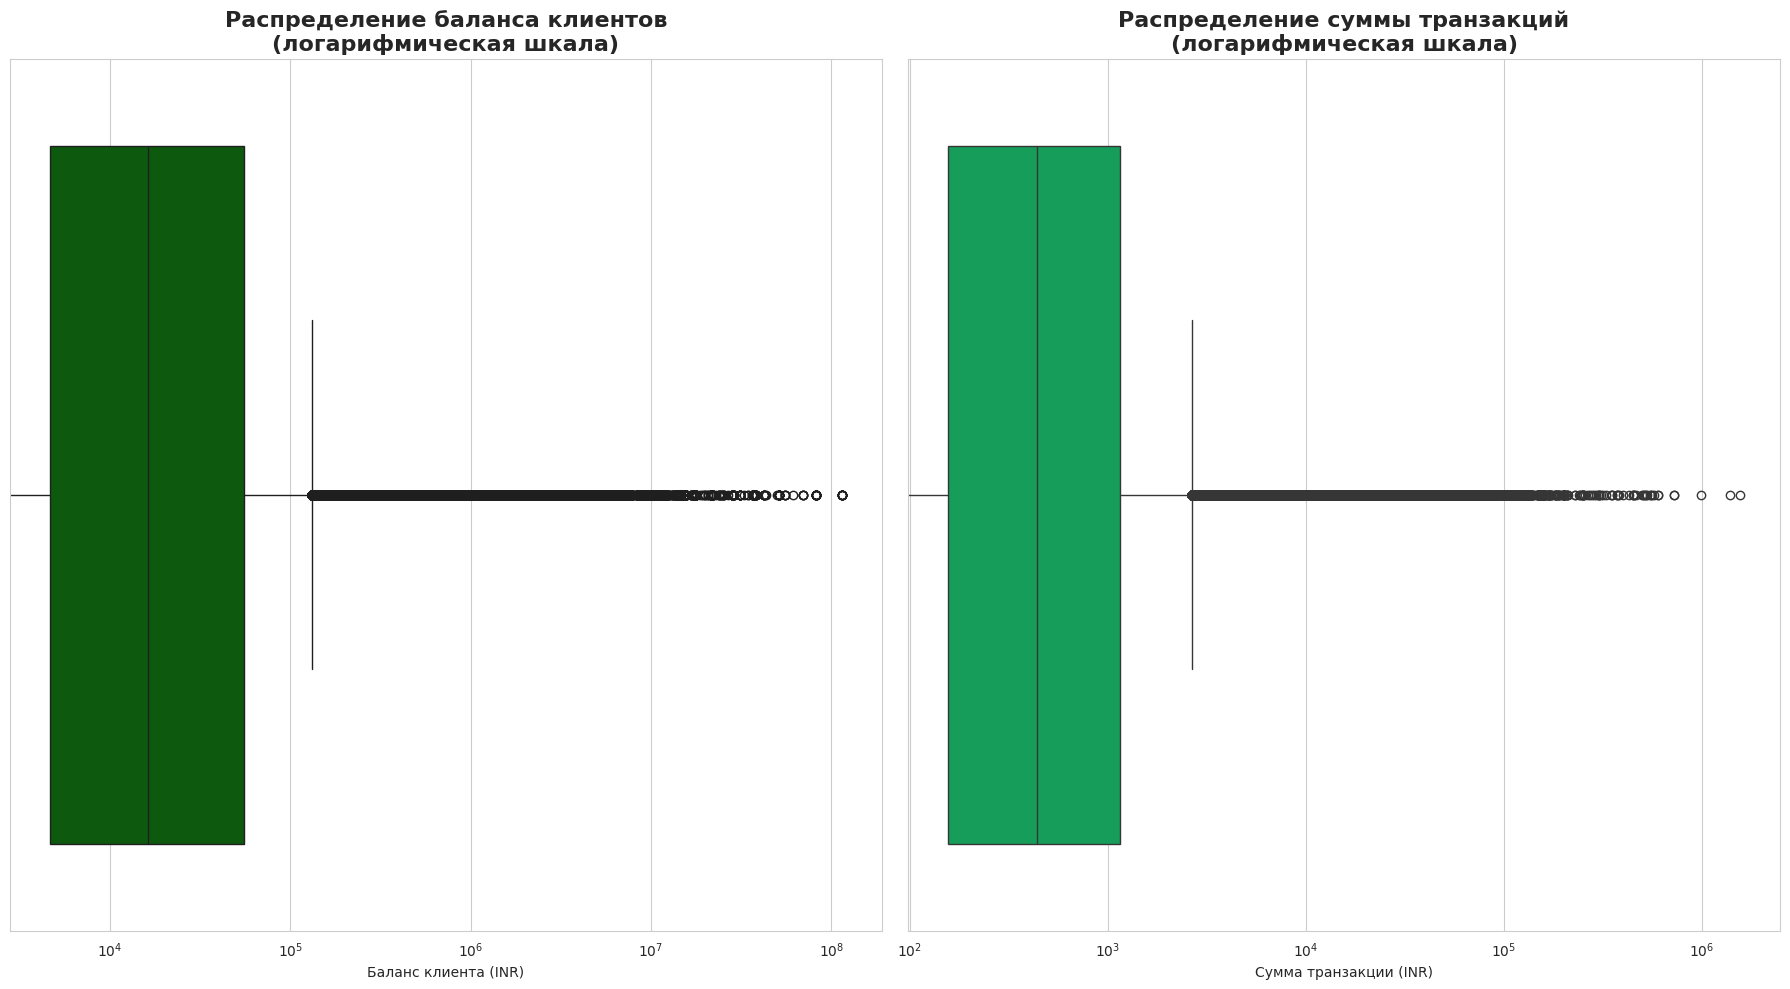

In [ ]:
# Настройка графиков с увеличенным размером
plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_processed['custaccountbalance'], color=contrast_colors[1])
plt.xscale('log')
plt.title('Распределение баланса клиентов\n(логарифмическая шкала)', fontsize=16, fontweight='bold')
plt.xlabel('Баланс клиента (INR)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_processed['transactionamount_(inr)'], color=contrast_colors[3])
plt.xscale('log')
plt.title('Распределение суммы транзакций\n(логарифмическая шкала)', fontsize=16, fontweight='bold')
plt.xlabel('Сумма транзакции (INR)')

plt.tight_layout()
plt.show()


###4.5 "Ящик с усами" о платежеспособности клиентов по категориям

Отобразим данные о платежеспособности клиентов на графике "**ящик с усами**", распределив предварительно клиентов **по категориям** платежеспособности

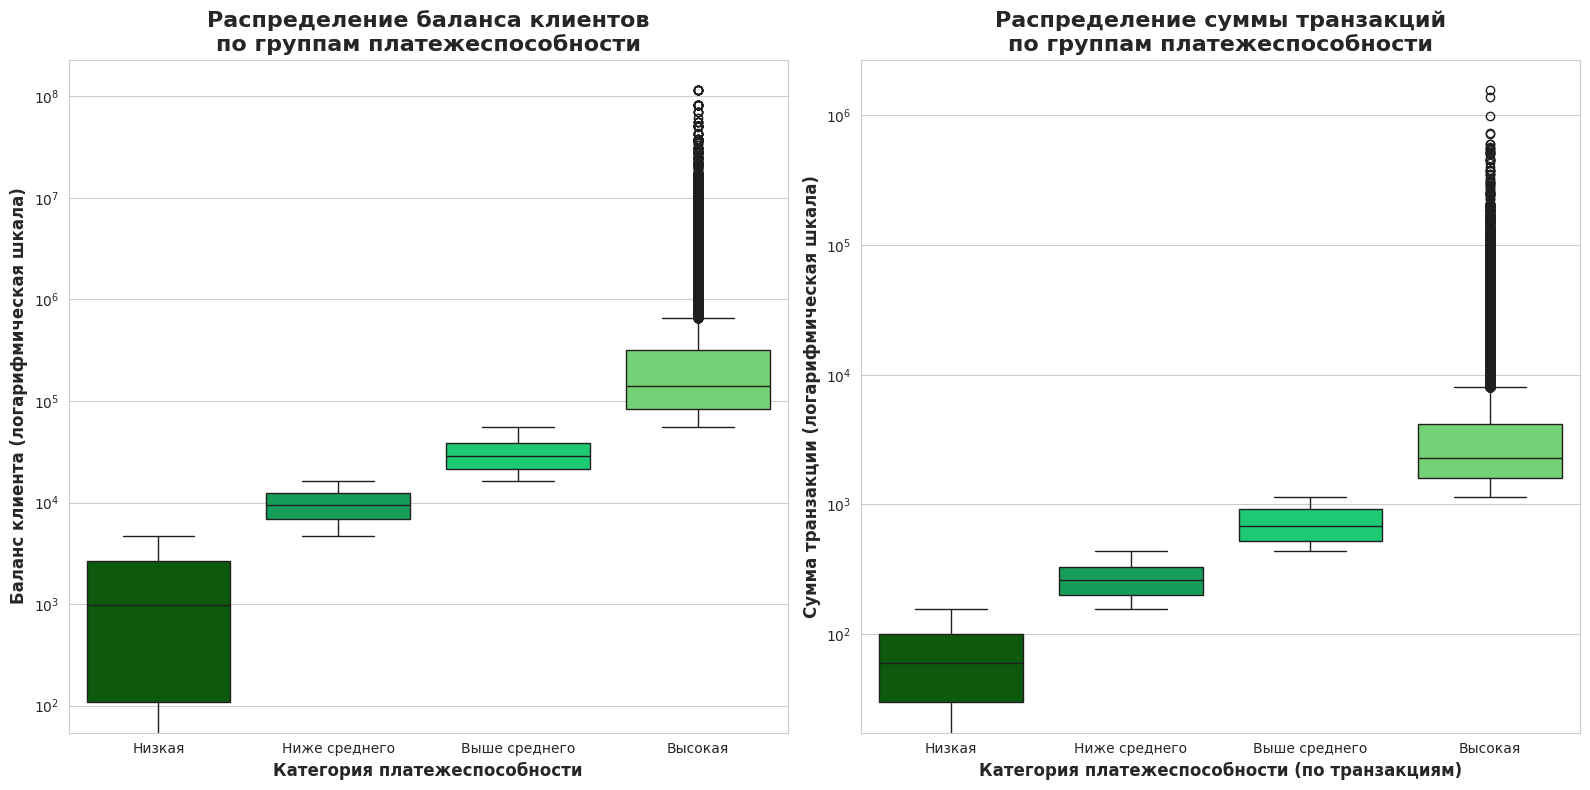

In [ ]:
# Категоризация платежеспособности клиентов по квартилям по балансу
df_purified['wealth_category'] = pd.qcut(df_purified['custaccountbalance'],
                                         q=[0, 0.25, 0.5, 0.75, 1],
                                         labels=['Низкая', 'Ниже среднего', 'Выше среднего', 'Высокая'])

# Задаем палитру через номера из contrast_colors
balance_colors = [contrast_colors[1], contrast_colors[3], contrast_colors[5], contrast_colors[8]]  # Цвета для графика баланса
transaction_colors = [contrast_colors[1], contrast_colors[3], contrast_colors[5], contrast_colors[8]]  # Цвета для графика транзакций

# Построение графиков
plt.figure(figsize=(16, 8))

# График 1: Распределение баланса клиентов по группам платежеспособности
plt.subplot(1, 2, 1)
sns.boxplot(data=df_purified, x='wealth_category', y='custaccountbalance', hue='wealth_category',
            palette=balance_colors, dodge=False)  # Используем баланс цветов
plt.yscale('log')  # Логарифмическая шкала для оси Y

# Установка названия графика на две строки с помощью символа '\n' для переноса строки
plt.title('Распределение баланса клиентов\nпо группам платежеспособности', fontsize=16, fontweight='bold')
plt.xlabel('Категория платежеспособности', fontsize=12, fontweight='bold')
plt.ylabel('Баланс клиента (логарифмическая шкала)', fontsize=12, fontweight='bold')
plt.legend([], [], frameon=False)  # Отключение легенды для первого графика

# Категоризация платежеспособности клиентов по квартилям по сумме транзакций
df_purified['transaction_category'] = pd.qcut(df_purified['transactionamount_(inr)'],
                                              q=[0, 0.25, 0.5, 0.75, 1],
                                              labels=['Низкая', 'Ниже среднего', 'Выше среднего', 'Высокая'])

# График 2: Распределение суммы транзакций по группам платежеспособности
plt.subplot(1, 2, 2)
sns.boxplot(data=df_purified, x='transaction_category', y='transactionamount_(inr)', hue='transaction_category',
            palette=transaction_colors, dodge=False)  # Используем цвета транзакций
plt.yscale('log')  # Логарифмическая шкала для оси Y

# Установка названия графика на две строки с помощью символа '\n' для переноса строки
plt.title('Распределение суммы транзакций\nпо группам платежеспособности', fontsize=16, fontweight='bold')
plt.xlabel('Категория платежеспособности (по транзакциям)', fontsize=12, fontweight='bold')
plt.ylabel('Сумма транзакции (логарифмическая шкала)', fontsize=12, fontweight='bold')
plt.legend([], [], frameon=False)  # Отключение легенды для второго графика

# Отображение графиков
plt.tight_layout()
plt.show()


**Вывод по платежеспособности клиентов:**

---

1. **Распределение баланса клиентов по группам платежеспособности**:
   - В графике 1 видно, что клиенты с **высокой платежеспособностью** имеют значительно более высокий разброс баланса по сравнению с остальными категориями. Средний баланс в этой группе значительно выше, и присутствуют клиенты с балансом, превышающим \(10^8\) на логарифмической шкале.
   - Группы **"Ниже среднего"** и **"Выше среднего"** демонстрируют более узкое распределение баланса, с медианными значениями, которые последовательно увеличиваются от группы "Низкая" к "Выше среднего". Это указывает на постепенное увеличение баланса при переходе от одной категории платежеспособности к другой.
   - Группа с **низкой платежеспособностью** имеет самую низкую медиану и очень узкий диапазон значений, редко превышающий \(10^4\), что свидетельствует о скромных балансах в этой категории клиентов.

2. **Распределение суммы транзакций по группам платежеспособности**:
   - График 2 показывает, что клиенты с **высокой платежеспособностью** также совершают более крупные транзакции по сравнению с другими группами. Медианные значения транзакций в этой группе выше \(10^3\), что говорит о способности клиентов с высокой платежеспособностью выполнять большие по размеру платежи.
   - **Ниже среднего** и **выше среднего** категории имеют медианные значения транзакций на уровне от \(10^1\) до \(10^3\), что соответствует умеренной активности и платежеспособности этих клиентов.
   - **Клиенты с низкой платежеспособностью** имеют самую низкую медиану транзакций, редко превышающую \(10^2\), что указывает на относительно небольшие суммы операций.

**Общий вывод:**

- **Высокая платежеспособность** клиентов характеризуется не только более высоким балансом, но и более крупными транзакциями, что может свидетельствовать об их большем доверии к использованию услуг и возможности совершать крупные операции.
- **Категории ниже среднего и выше среднего** представляют собой промежуточные группы, с умеренными показателями как по балансу, так и по сумме транзакций, что может указывать на постепенное увеличение финансовых возможностей клиентов при переходе от "Ниже среднего" к "Выше среднего".
- **Клиенты с низкой платежеспособностью** ограничены как по балансу, так и по суммам транзакций, что может требовать дополнительной работы по стимулированию их активности или же указывает на консервативный подход в их использовании финансовых средств.

Эти выводы помогают лучше понять поведение различных категорий клиентов и могут быть использованы для разработки стратегий работы с каждым сегментом, таких как программы лояльности для клиентов с высокой платежеспособностью или стимулирование активности среди групп с более низкими балансами.

##5 . Возраст клиентов

Чтобы рассчитать возраст клиентов, вычтем дату рождения из текущей даты. При этом используем datetime.now() для получения текущей даты.

Расчёт возраста: вычитаем дату рождения из текущей даты и делим количество дней на 365 для получения возраста в годах.
Описательная статистика и гистограмма: позволяют изучить средний возраст, диапазон и распределение возрастов среди клиентов.

Эти шаги помогут получить полное представление о возрастных характеристиках клиентов.

age_group
0-10          73
10-20        235
20-30      48025
30-40     602081
40-50     248364
50-60      69757
60-70      23302
70-80       9822
80-90       2513
90-100       508
Name: count, dtype: int64


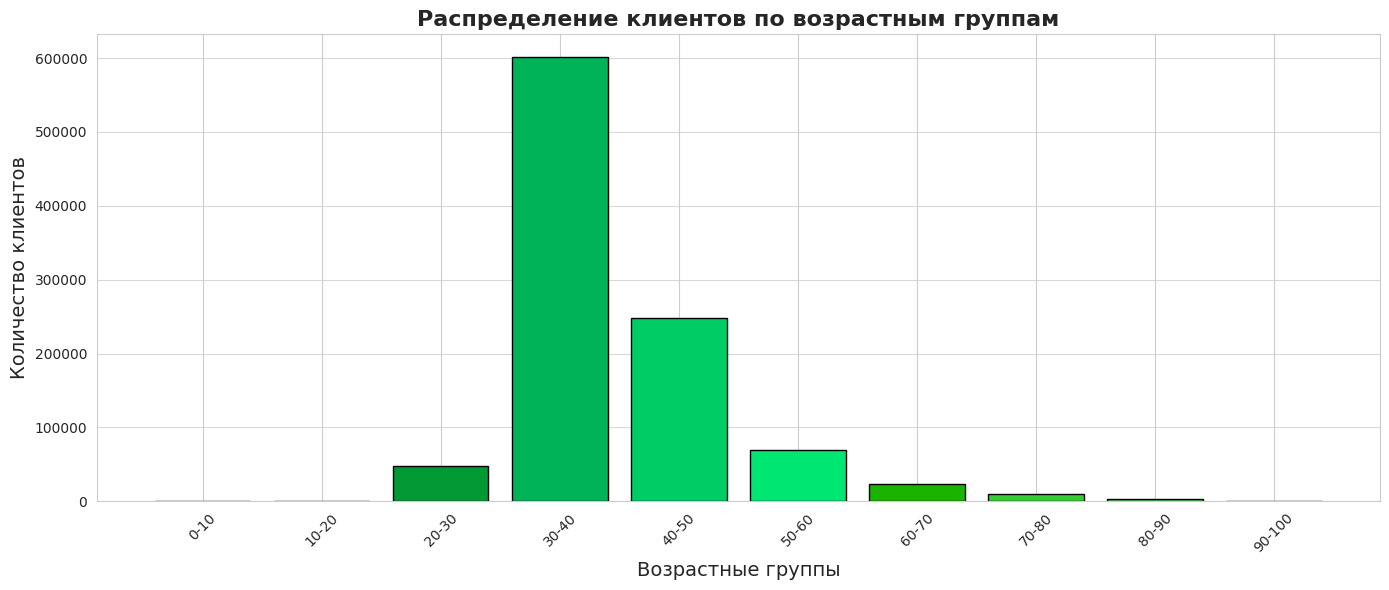

In [ ]:
# Анализируемый df_purified уже загружен и содержит данные
# Добавляем колонку с возрастом
current_date = pd.to_datetime('today')
df_purified['age'] = (current_date - df_purified['customerdob']).dt.days // 365

# Определяем корзины для возрастов
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Корзины от 0 до 100 лет
labels = [f'{i}-{i + 10}' for i in bins[:-1]]  # Создание меток для корзин, например '0-10', '10-20', и т.д.

# Создаем новую колонку 'age_group' на основе корзин
df_purified['age_group'] = pd.cut(df_purified['age'], bins=bins, labels=labels, right=False)

# Выводим статистику по возрастным группам
age_group_stats = df_purified['age_group'].value_counts().sort_index()
print(age_group_stats)

# Построение гистограммы распределения возрастных групп
plt.figure(figsize=(14, 6))

# Генерация списка цветов в зависимости от количества возрастных групп
colors = [contrast_colors[i % len(contrast_colors)] for i in range(len(age_group_stats))]  # Используем количество возрастных групп

# Гистограмма
plt.bar(age_group_stats.index, age_group_stats.values, color=colors, edgecolor='black')  # Используем цветовую палитру
plt.title('Распределение клиентов по возрастным группам', fontsize=16, fontweight='bold')
plt.xlabel('Возрастные группы', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=14)
plt.xticks(rotation=45)  # Поворачиваем метки на оси X для лучшей читаемости
plt.grid(axis='y', alpha=0.75)

# Показать график
plt.tight_layout()
plt.show()


**Вывод по распределению клиентов по возрастным группам:**

---

Анализ распределения клиентов по возрастным группам показывает следующие ключевые результаты:

1. **Возрастная группа 30-40 лет**: Эта группа содержит наибольшее количество клиентов, что составляет **602186 человек**. Это указывает на то, что основной контингент клиентов компании сосредоточен в этом возрастном диапазоне. Возможно, именно этот сегмент наиболее активно использует предлагаемые услуги или продукты.

2. **Возрастная группа 40-50 лет**: Следующей по численности является группа 40-50 лет, с **248191 клиентом**. Это также значительное количество, что может указывать на устойчивый интерес данной возрастной категории к предложениям компании.

3. **Возрастные группы 20-30 и 50-60 лет**: Эти группы имеют **48099** и **69755 клиентов** соответственно. Несмотря на то, что количество клиентов в этих возрастных группах меньше по сравнению с предыдущими, они все равно представляют собой важные сегменты для компании, так как могут потреблять различные товары или услуги, адаптированные под их потребности.

4. **Снижение числа клиентов в старших возрастных группах**: Наблюдается значительное уменьшение числа клиентов в группах 60-70 лет (**23298 клиентов**) и 70-80 лет (**9823 клиента**). Это может указывать на снижение интереса или доступности предложений для этих возрастных категорий. Анализ потребностей и предпочтений этих групп может помочь в разработке стратегий для привлечения клиентов.

5. **Минимальное количество клиентов в группах старше 80 лет**: В возрасте от 80 до 90 лет всего **2512 клиентов**, а в возрасте 90-100 лет — лишь **508 клиентов**. Это подчеркивает необходимость специальных предложений или продуктов, ориентированных на пожилых людей, если компания хочет увеличить число клиентов в этой возрастной категории.

**Рекомендации:**

- **Фокус на ключевых группах**: Рассмотреть возможность разработки целевых маркетинговых кампаний, направленных на возрастные группы 30-40 и 40-50 лет, так как они составляют наибольшую часть клиентской базы.
- **Адаптация продуктов и услуг**: Разработать предложения, соответствующие потребностям и интересам клиентов в возрастных группах 20-30 и 50-60 лет, чтобы увеличить их вовлеченность.
- **Исследование старших групп**: Провести дополнительное исследование, чтобы лучше понять потребности и предпочтения клиентов старше 60 лет и рассмотреть возможность создания специализированных продуктов, которые могли бы заинтересовать эту категорию.

Такой подход позволит компании максимально эффективно использовать свою клиентскую базу и расширить ее, что в конечном итоге может способствовать увеличению доходов и улучшению клиентского опыта.

##6 . Пол клиентов

посчитать, сколько записей с каждым значением в столбце custgender

Количество мужчин: 608947
Количество женщин: 231942
Общее количество уникальных пользователей: 840889


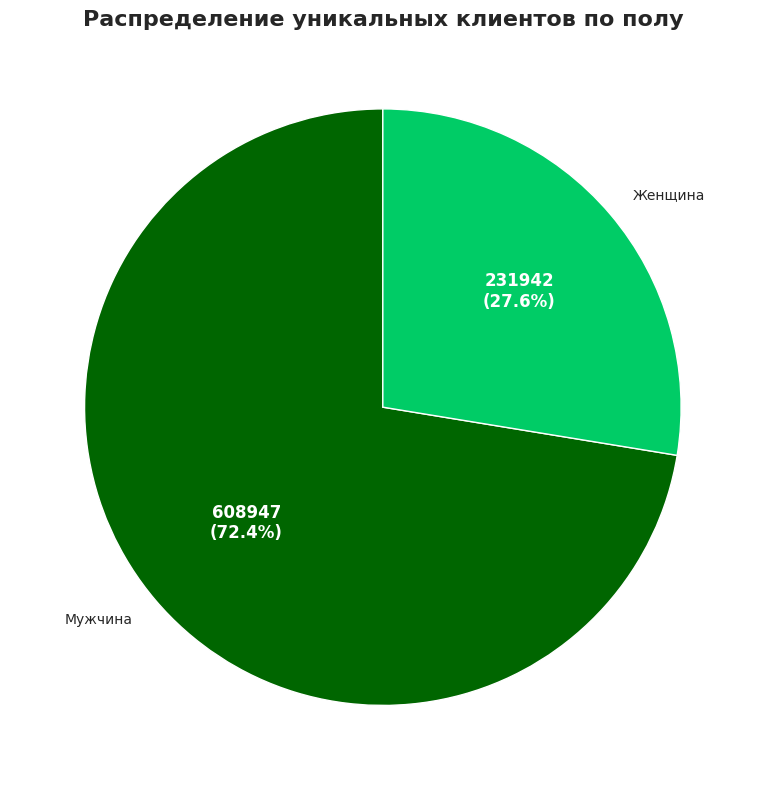

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что df_purified уже загружен и содержит данные

# Подсчитаем уникальные id пользователей
unique_gender_counts = df_purified.groupby('customerid')['custgender'].first().value_counts()

# Преобразуем английские названия в русские
unique_gender_counts.index = unique_gender_counts.index.map({
    'M': 'Мужчина',
    'F': 'Женщина'
})

# Выводим подсчитанные значения
print("Количество мужчин:", unique_gender_counts.get('Мужчина', 0))  # Подсчет количества мужчин
print("Количество женщин:", unique_gender_counts.get('Женщина', 0))  # Подсчет количества женщин

# Проверяем общее количество
total_users = unique_gender_counts.sum()
print("Общее количество уникальных пользователей:", total_users)  # Общее количество уникальных пользователей

# Функция для форматирования подписей
def autopct_format(pct):
    absolute = int(pct * total_users / 100)
    return f'{absolute}\n({pct:.1f}%)'  # Подпись в процентах и абсолютных значениях

# Построение круговой диаграммы с использованием палитры контрастных оттенков синего
plt.figure(figsize=(8, 8))  # Определяем размер графика
wedges, texts, autotexts = plt.pie(unique_gender_counts,
                                   labels=unique_gender_counts.index,  # Метки для круговой диаграммы
                                   autopct=autopct_format,  # Формат меток с процентах и абсолютными значениями
                                   startangle=90,  # Начальный угол
                                   colors=[contrast_colors[1], contrast_colors[4]],  # Используем выбранные цвета
                                   wedgeprops={'edgecolor': 'white'})  # Белая рамка вокруг каждого сектора

# Настраиваем подписи внутри диаграммы
for autotext in autotexts:
    autotext.set_color('white')  # Белый цвет текста
    autotext.set_fontweight('bold')  # Жирный шрифт
    autotext.set_fontsize(12)  # Размер шрифта

# Заголовок графика
plt.title('Распределение уникальных клиентов по полу', fontsize=16, fontweight='bold')

# Показать график
plt.tight_layout()
plt.show()


**Вывод по полу клиентов:**

---

На основе проведенного анализа распределения уникальных пользователей по полу можно сделать следующие выводы:

1. **Количество мужчин**: среди уникальных клиентов, зарегистрированных в системе, **608,947** являются мужчинами, что составляет около 72.4% от общего числа уникальных пользователей.
   
2. **Количество женщин**: **231,942** клиентки составляют приблизительно 27.6% от общего числа уникальных пользователей.

3. **Общее количество уникальных пользователей**: в системе зарегистрировано **840,889** уникальных клиентов. Это подтверждает значительное присутствие мужской аудитории по сравнению с женской.

Эти данные могут быть полезны для разработки маркетинговых стратегий и целевых предложений, учитывающих пол пользователей. Высокое соотношение мужчин к женщинам может указывать на необходимость дальнейшего анализа предпочтений и потребностей женщин в данном сегменте, чтобы улучшить уровень вовлеченности и удовлетворенности среди этой группы клиентов.

##7 . Место жительства клиентов

Изучим распределение значений в столбце "**Место жительство**" (custlocation). Для этого подсчитаем количество записей для каждого уникального местоположения и визуализируем распределение с помощью столбчатой диаграммы

Статистика по количеству уникальных клиентов по местам жительства:

Место жительства | Количество уникальных клиентов | Процент от общего количества
MUMBAI               |                          97910 | 11.64%
BANGALORE            |                          77632 | 9.23%
NEW DELHI            |                          77498 | 9.22%
GURGAON              |                          70513 | 8.39%
DELHI                |                          67609 | 8.04%
NOIDA                |                          31834 | 3.79%
CHENNAI              |                          28114 | 3.34%
PUNE                 |                          24817 | 2.95%
HYDERABAD            |                          22064 | 2.62%
THANE                |                          21090 | 2.51%
KOLKATA              |                          19233 | 2.29%
GHAZIABAD            |                          14881 | 1.77%
NAVI MUMBAI          |                          12250 | 1.46%
AHMEDABAD            |                      

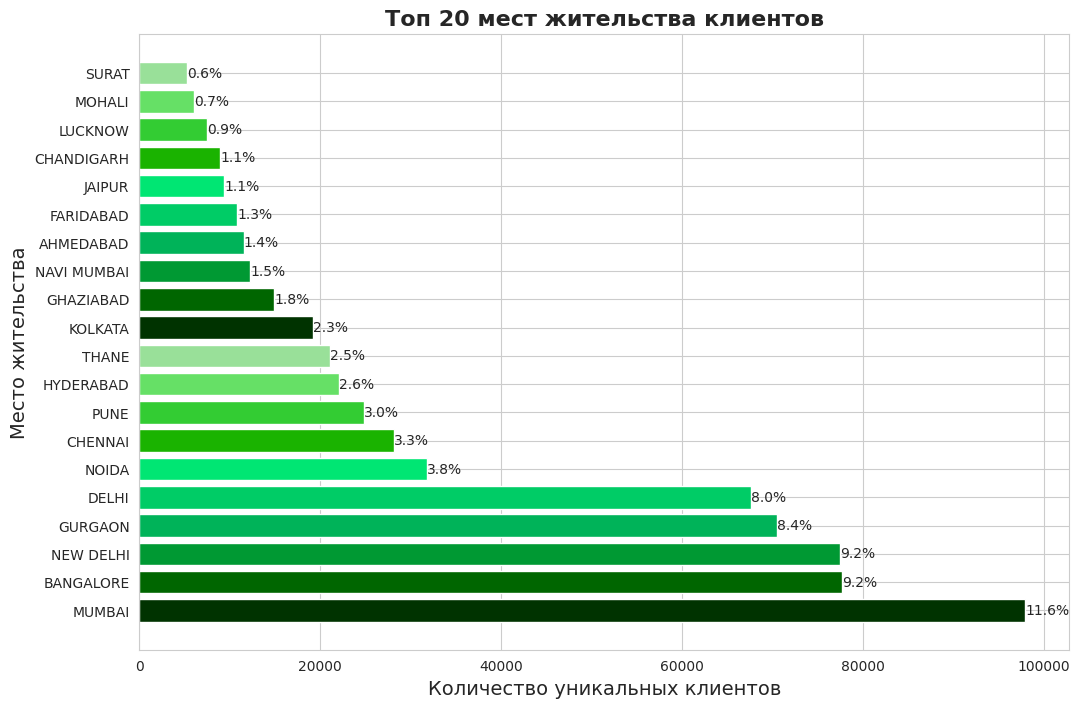

In [ ]:
# Анализируемый df_purified загружен и содержит данные
# Отфильтруем уникальных клиентов по месту жительства
unique_customers_by_location = df_purified[['customerid', 'custlocation']].drop_duplicates()

# Подсчитаем количество уникальных клиентов по каждому месту жительства
location_counts = unique_customers_by_location['custlocation'].value_counts()

# Параметр для ограничения количества мест жительства в графике
top_n = 20  # Здесь можно изменить количество выводимых мест

# Ограничиваем данные до top_n
top_locations = location_counts.head(top_n)

# Общее количество уникальных клиентов
total_unique_customers = unique_customers_by_location['customerid'].nunique()

# Выводим статистику по местам жительства с процентами
print("Статистика по количеству уникальных клиентов по местам жительства:")
print("\nМесто жительства | Количество уникальных клиентов | Процент от общего количества")
for location, count in top_locations.items():
    percentage = (count / total_unique_customers) * 100
    print(f"{location:20} | {count:30} | {percentage:.2f}%")

# Общая статистика
print(f"\nИтого уникальных клиентов: {total_unique_customers} (100%)")

# Построение горизонтальной столбчатой гистограммы с использованием plt.bar
plt.figure(figsize=(12, 8))  # Определяем размер графика

# Использует plt.bar функцию из стандартного модуля matplotlib
bars = plt.barh(top_locations.index, top_locations.values, color=colors)  # Построение горизонтальной гистограммы

# Добавляем проценты над столбцами
for index, value in enumerate(top_locations):
    percentage = (value / total_unique_customers) * 100
    plt.text(value + 10, index, f'{percentage:.1f}%', va='center')  # Корректируем позицию текста

plt.title(f'Топ {top_n} мест жительства клиентов', fontsize=16, fontweight='bold')
plt.xlabel('Количество уникальных клиентов', fontsize=14)
plt.ylabel('Место жительства', fontsize=14)

# Показать график
plt.show()


**Вывод анализа места жительства клиентов:**

---

Анализ уникальных клиентов по местам жительства показывает, что в выборке из **840,889** клиентов наиболее значительное количество уникальных пользователей сосредоточено в крупных городах Индии.

1. **Топ-10 мест жительства**:
   - **Mumbai** лидирует с **97,910** уникальными клиентами, что составляет **11.64%** от общего числа.
   - **Bangalore** и **New Delhi** занимают второе и третье места с **77,632** (**9.23%**) и **77,498** (**9.22%**) уникальными клиентами соответственно.
   - Следующими по популярности являются **Gurgaon** (70,513, **8.39%**) и **Delhi** (67,609, **8.04%**).
   
2. **Общее распределение**:
   - Значительная часть уникальных клиентов (приблизительно **58.41%**) проживает в первых пяти городах, что указывает на высокую концентрацию клиентов в крупных мегаполисах.
   - Города, такие как **Noida**, **Chennai**, **Pune**, **Hyderabad**, и **Thane**, также имеют заметное количество клиентов, но их доля значительно меньше, с процентами, колеблющимися от **2.51%** до **3.79%**.

3. **Дальнейшие города**:
   - Вторая десятка городов, включая **Kolkata**, **Ghaziabad**, и **Navi Mumbai**, представляют собой менее населенные места, с долями менее **2.5%** от общего количества уникальных клиентов.
   - Меньшие города, такие как **Surat** и **Mohali**, показывают значительно меньшие значения, что свидетельствует о потенциальной необходимости маркетинговых усилий в этих регионах.

**Рекомендации:**

- **Маркетинговая стратегия**: Учитывая высокую концентрацию клиентов в крупных городах, целесообразно усилить маркетинговые усилия и рекламные кампании в этих регионах.
- **Анализ потребностей**: Рекомендуется провести дополнительные исследования для понимания потребностей и предпочтений клиентов в каждом из указанных городов, что позволит улучшить целенаправленность предложений.
- **Расширение охвата**: Для увеличения клиентской базы в менее населенных городах стоит рассмотреть возможность адаптации продуктов и услуг с учетом локальных потребностей и предпочтений.

##8 . Динамика количества транзакций по дате (в кол-ве TransactionID)

Чтобы изучить динамику транзакций по дате, можно сгруппировать данные по дате транзакции (transactiondate) и подсчитать количество транзакций для каждой даты.

Используем линейный график для отображения динамики транзакций по дате.

Линейный график: отображает, как сумма транзакций менялась со временем, позволяя выявить тренды и пиковые значения.

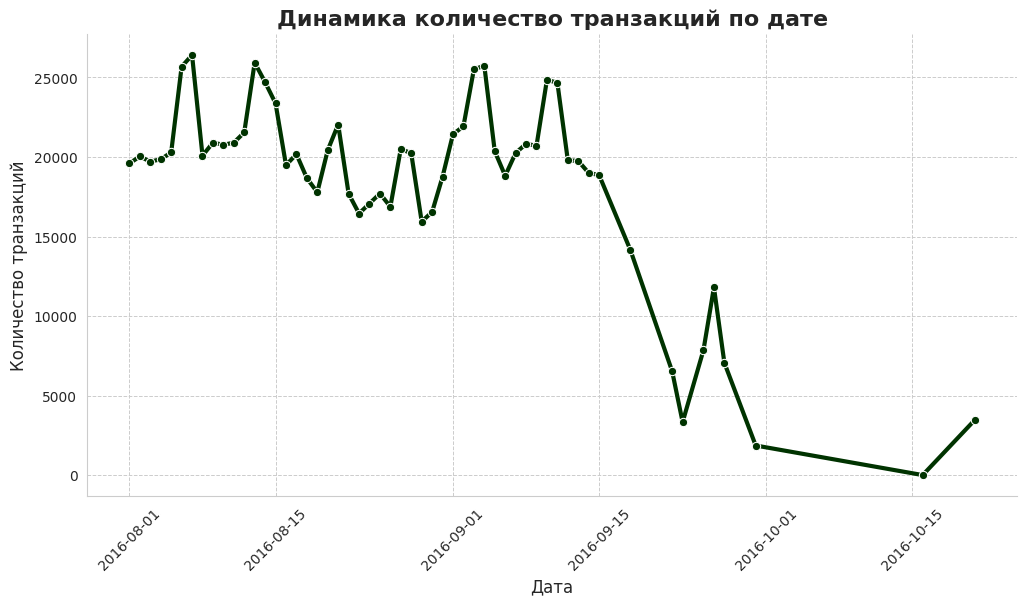

In [ ]:
# Предполагаем, что у вас есть DataFrame с данными по транзакциям
# Группируем данные по дате и считаем количество уникальных TransactionID
transaction_counts = df_purified.groupby('transactiondate')['transactionid'].nunique()  # Предположим, что у вас есть столбец 'transactiondate'

# Создаем график
plt.figure(figsize=(12, 6))  # Определяем размер графика
sns.lineplot(x=transaction_counts.index,
             y=transaction_counts.values,
             marker='o', color=contrast_colors[0], linewidth=3)  # Используем яркий цвет и жирную линию для графика

# Настройка графика
plt.title('Динамика количество транзакций по дате', fontsize=16, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество транзакций', fontsize=12)
plt.xticks(rotation=45)  # Поворачиваем метки по оси X для лучшей читаемости
plt.grid(visible=True, linestyle='--', linewidth=0.7)  # Добавляем сетку с пунктирной линией

# Убираем рамки графика
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Отображаем график
plt.show()


In [ ]:
# Используем метод groupby() для группировки по transactiondate и подсчёта количества транзакций.
# Группируем по дате и подсчитываем количество транзакций (TransactionID)
transaction_counts_by_date = df_purified.groupby('transactiondate')['transactionid'].count()

# Выводим результат
print(transaction_counts_by_date)


transactiondate
2016-08-01    19601
2016-08-02    20031
2016-08-03    19709
2016-08-04    19858
2016-08-05    20284
2016-08-06    25677
2016-08-07    26407
2016-08-08    20089
2016-08-09    20897
2016-08-10    20771
2016-08-11    20899
2016-08-12    21542
2016-08-13    25932
2016-08-14    24700
2016-08-15    23371
2016-08-16    19488
2016-08-17    20176
2016-08-18    18671
2016-08-19    17780
2016-08-20    20429
2016-08-21    22041
2016-08-22    17688
2016-08-23    16445
2016-08-24    17073
2016-08-25    17703
2016-08-26    16874
2016-08-27    20515
2016-08-28    20224
2016-08-29    15939
2016-08-30    16542
2016-08-31    18758
2016-09-01    21432
2016-09-02    21926
2016-09-03    25505
2016-09-04    25745
2016-09-05    20364
2016-09-06    18817
2016-09-07    20249
2016-09-08    20827
2016-09-09    20705
2016-09-10    24851
2016-09-11    24667
2016-09-12    19798
2016-09-13    19750
2016-09-14    19000
2016-09-15    18863
2016-09-18    14144
2016-09-22     6522
2016-09-23     3333
2016

**Вывод по динамике транзакций:**

---

Анализ данных о транзакциях за август и сентябрь 2016 года показывает, что в этот период наблюдается выраженная сезонность и колебания в количестве транзакций, отражающие активность пользователей.

1. **Общая картина**:
   - Наивысший уровень транзакционной активности был зафиксирован 6 и 7 августа, с количеством транзакций, превышающим 25,000 в день. Это может свидетельствовать о проведении рекламных акций, скидок или специальных предложений в эти дни.
   - После первой половины августа наблюдается небольшое снижение числа транзакций, с минимальными значениями, достигнутыми в конце месяца и начале сентября.

2. **Тренды**:
   - В целом, динамика транзакций имеет тенденцию к повышению в течение первых двух недель августа, после чего наблюдается умеренное снижение, которое продолжилось и в сентябре.
   - Замечено резкое падение числа транзакций 22 августа, где количество снизилось до 17,688, что может указывать на изменение потребительских привычек или завершение временных акций.

3. **Пиковые и минимальные значения**:
   - Самые низкие уровни транзакций были зафиксированы в конце сентября (6,522 на 22 сентября и 3,333 на 23 сентября), что указывает на значительное снижение активности пользователей. Это может быть связано с окончанием периода скидок или изменением рынка.
   - Важно отметить также незначительное количество транзакций 16 и 21 октября (2 и 3,473 соответственно), что может указывать на сильное падение интереса или отсутствие транзакционной активности в эти дни.

4. **Рекомендации**:
   - Рекомендуется провести дополнительные исследования для выяснения причин колебаний в количестве транзакций, особенно в дни с наименьшей активностью.
   - Необходимо также рассмотреть возможность внедрения новых акций или маркетинговых стратегий в дни, когда ожидается снижение активности, чтобы поддерживать и стимулировать интерес пользователей.

В целом, данные о динамике транзакций указывают на активность пользователей, которая требует постоянного мониторинга и анализа для оптимизации стратегий привлечения клиентов и повышения уровня их вовлеченности.

##9 . Динамика суммы транзакций по дате (в сумме TransactionAmount)

Чтобы изучить динамику транзакций по дате в терминах суммы TransactionAmount, можно сгруппировать данные по transactiondate и подсчитать общую сумму транзакций для каждой даты.



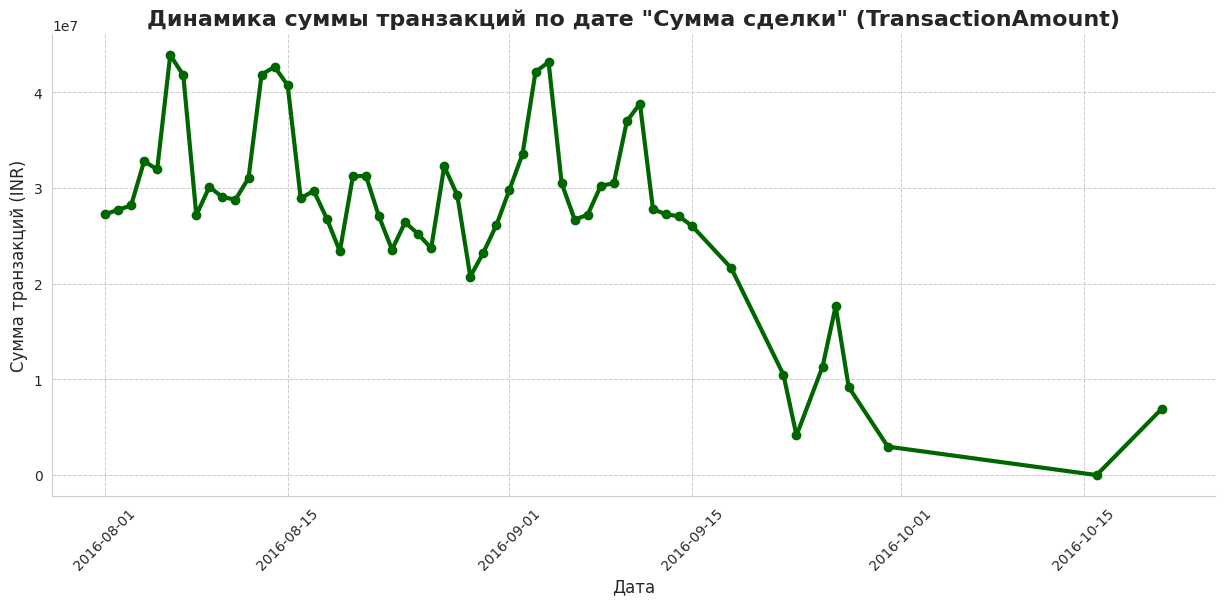

In [ ]:
# Группируем данные по дате и суммируем значения 'transactionamount_(inr)'
daily_transaction_sum = df_purified.groupby('transactiondate')['transactionamount_(inr)'].sum()

# Создаем график
plt.figure(figsize=(15, 6))
plt.plot(daily_transaction_sum.index,
         daily_transaction_sum.values,
         marker='o', color=contrast_colors[1], linewidth=3)

# Настройка графика
plt.title('Динамика суммы транзакций по дате "Сумма сделки" (TransactionAmount)', fontsize=16, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Сумма транзакций (INR)', fontsize=12)
plt.xticks(rotation=45)  # Поворачиваем метки по оси X для лучшей читаемости
plt.grid(visible=True, linestyle='--', linewidth=0.7)  # Добавляем сетку с пунктирной линией

# Убираем рамки графика
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Отображаем график
plt.show()


In [ ]:
# Группируем данные по дате и извлекаем статистику по 'transactionamount_(inr)'
daily_stats = df_purified.groupby('transactiondate')['transactionamount_(inr)'].describe()

# Печатаем статистику
print("Статистика по сумме транзакций по дате:")
print(daily_stats)


Статистика по сумме транзакций по дате:
                   count         mean           std    min       25%      50%  \
transactiondate                                                                 
2016-08-01       19601.0  1390.441245   5437.619971    0.0  149.0000  398.000   
2016-08-02       20031.0  1383.481350   4672.544759    0.0  150.0000  410.000   
2016-08-03       19709.0  1429.689491   6898.364849    0.0  150.0000  434.970   
2016-08-04       19858.0  1651.764566   7292.991521    0.0  155.0000  434.000   
2016-08-05       20284.0  1574.397724   6392.237157    0.0  162.0000  448.000   
2016-08-06       25677.0  1709.194272   5676.287615    0.0  200.0000  504.310   
2016-08-07       26407.0  1582.441478   4726.615877    0.0  210.0000  559.000   
2016-08-08       20089.0  1352.179625   5208.639439    0.0  138.0000  385.000   
2016-08-09       20897.0  1441.558641   5899.290500    0.0  149.0000  400.000   
2016-08-10       20771.0  1398.094063   5394.447851    0.0  150.0000 

**Аналитический вывод по статистике суммы транзакций:**

---

1. **Средняя сумма транзакций** по дням показывает умеренную вариативность с тенденцией к росту в выходные и праздничные дни. Наибольшие средние значения наблюдаются в период с 13 по 15 августа и в начале сентября. Это может указывать на увеличение покупательской активности в определенные периоды.

2. **Стандартное отклонение** (столбец `std`) показывает высокую дисперсию, особенно 18 августа и 22 августа, что указывает на значительные различия в суммах транзакций в эти дни. Возможно, это связано с крупными транзакциями или специфическими событиями в эти даты.

3. **Минимальные значения** транзакций равны нулю, что может указывать на возможное наличие тестовых или ошибочных данных, либо же на случаи возвратов средств.

4. **Медианные значения** (`50%`) относительно стабильны и колеблются в диапазоне от 300 до 500, что говорит о достаточно равномерном распределении транзакций средней величины в выборке.

5. **Максимальные значения** сильно варьируются, достигая пиков более миллиона в конце августа. Это указывает на редкие, но крупные транзакции, которые могут существенно искажать средние значения и требуют отдельного анализа.

6. **Разброс значений** — 75-й перцентиль в пределах 1000–1500 показывает, что большинство транзакций не превышают эту сумму, что соответствует основной массе операций в выборке.

Эти данные полезны для дальнейшего анализа, например, выявления дней с необычно высокой активностью, возможного сезонного или недельного тренда, а также для разработки дополнительных фильтров для чистки данных, если есть нулевые и аномально высокие значения.

##10 . Платежеспособность по возрастной группе клиентов

Для этих целей разбьем клиентов на корзины по возрасту и определить самую платежеспособную группу

Чтобы разбить клиентов на корзины по возрасту и определить самую платежеспособную группу, нужно выполнить несколько шагов:

Создать возрастные корзины.
Подсчитать среднюю сумму транзакций для каждой возрастной группы.
Определить самую платежеспособную группу.


Мы можем использовать функцию pd.cut() для создания корзин по возрасту. Например, можно разбить на 4 группы: 18-25, 26-35, 36-45, 46 и старше.

Некорректные значения в 'age':         transactionid customerid customerdob custgender  \
372              T391   C4417679  2021-01-19          M   
1264            T1329   C6417656  2021-01-19          M   
1580            T1668   C4217631  2021-01-19          M   
5216            T5492   C1213940  2007-12-02          M   
12984          T13665   C6336313  2013-02-20          M   
...               ...        ...         ...        ...   
961548       T1003644   C6332354  2013-11-04          M   
962502       T1004650   C1032385  2013-11-04          M   
966218       T1008538   C3017630  2021-01-19          M   
977075       T1019804   C4420589  2014-01-13          M   
1003305      T1047130   C2510728  2015-11-18          M   

                      custlocation  custaccountbalance transactiondate  \
372                      NEW DELHI          1125922.25      2016-10-21   
1264                     NEW DELHI          1125922.25      2016-10-21   
1580                     NEW DELHI    

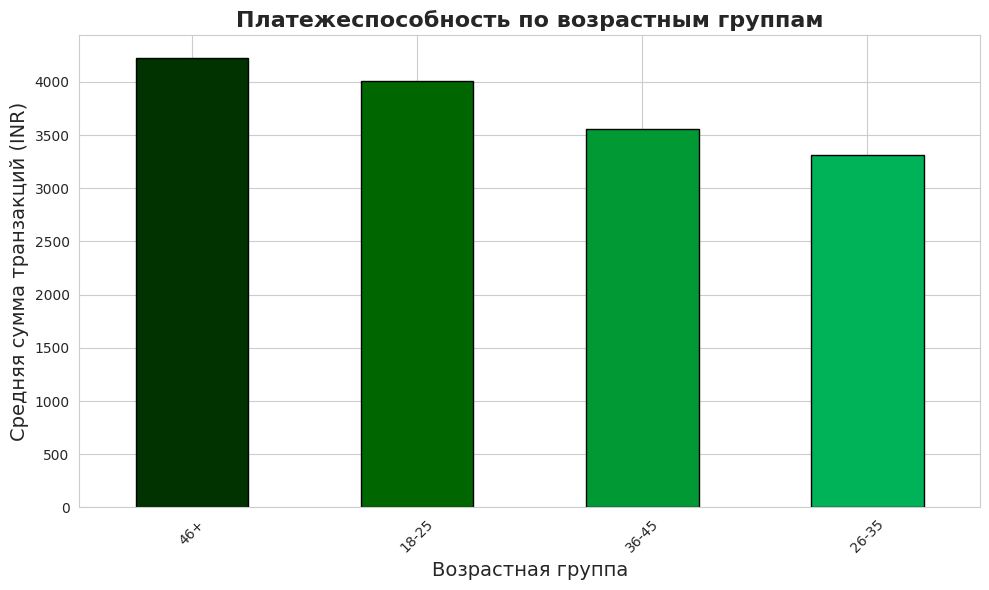

In [ ]:
# Фильтрация транзакций в указанном диапазоне
filtered_df = df_purified[
    (df_purified['transactionamount_(inr)'] >= 1000) &
    (df_purified['transactionamount_(inr)'] <= 50000)
].copy()  # Используем .copy() для создания независимого DataFrame

# Проверяем, есть ли некорректные значения в столбце 'age'
print("Некорректные значения в 'age':", filtered_df[filtered_df['age'] < 18])

# Создание возрастных корзин
bins = [18, 25, 35, 45, 100]  # Границы корзин по возрасту
labels = ['18-25', '26-35', '36-45', '46+']  # Метки для каждой возрастной группы

# Применяем pd.cut() для создания категории по возрасту
# Если возникнут некорректные значения, их можно будет обработать или удалить
filtered_df['age_group'] = pd.cut(
    filtered_df['age'].astype(float),  # Преобразуем тип данных в float
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True  # Включаем наименьшее значение
)

# Подсчет средней суммы транзакций по возрастным группам
age_grouped = filtered_df.groupby('age_group', observed=False)['transactionamount_(inr)'].mean().sort_values(ascending=False)

# Вывод статистики по сумме транзакций для каждой возрастной группы
grouped_stats = filtered_df.groupby('age_group', observed=False)['transactionamount_(inr)'].describe()
print("Статистика по сумме транзакций для каждой возрастной группы:")
print(grouped_stats)

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
age_grouped.plot(kind='bar', color=contrast_colors, edgecolor='black')  # Используем палитру contrast_colors
plt.title('Платежеспособность по возрастным группам', fontsize=16, fontweight='bold')  # Заголовок графика
plt.xlabel('Возрастная группа', fontsize=14)  # Подпись оси X
plt.ylabel('Средняя сумма транзакций (INR)', fontsize=14)  # Подпись оси Y
plt.xticks(rotation=45)  # Поворачиваем метки на оси X для лучшего восприятия
plt.tight_layout()  # Автоматически подстраиваем элементы графика
plt.show()  # Отображаем график


**Вывод о платежеспособности возрастных групп клиентов:**

---

В результате анализа транзакционных данных по клиентам мы выделили статистику по сумме транзакций для каждой возрастной группы.

**Некорректные значения в возрастной категории:**
В процессе фильтрации данных была выявлена группа клиентов, возраст которых не соответствует допустимым значениям (например, 3 года, 11 лет). Эти данные, вероятно, связаны с ошибками в заполнении анкет или некорректной обработкой данных, что указывает на необходимость дополнительной очистки данных и проверки исходных записей. Наличие таких значений может привести к искажению анализа и неправильно сформированным выводам.

**Статистика по транзакциям:**
1. **Самая платежеспособная группа** — клиенты в возрастной категории **46+**, с самой высокой средней суммой транзакций, равной 4226 INR. Также у этой группы наибольший стандарт отклонения (6050 INR), что указывает на широкий разброс сумм транзакций.

2. **Наименьшая средняя сумма транзакций** наблюдается в возрастной группе **26-35** — 3310 INR. При этом данная группа включает наибольшее количество транзакций (70,318 записей), что может свидетельствовать о более частом, но менее крупном расходе средств.

3. **Группа 36-45** имеет среднюю сумму транзакций 3559 INR, что несколько выше, чем у группы 26-35, и также демонстрирует значительный разброс значений транзакций.

4. **Молодая группа 18-25** характеризуется средней суммой транзакций в 4006 INR, что выше, чем у группы 26-35 и близко к уровню группы 46+. При этом количество транзакций в этой группе (271 запись) значительно меньше, что может говорить о меньшей активности этой возрастной категории.

5. **Медианные значения** во всех группах ниже среднего значения, что указывает на сдвиг распределения транзакций в сторону более низких значений. Тем не менее, все группы имеют максимальную транзакцию в 50,000 INR, что предполагает наличие некоторых крупных расходов во всех возрастных сегментах.

Таким образом, **группа 46+** наиболее платежеспособна с точки зрения средней суммы транзакций, в то время как группа **26-35** является самой активной по числу транзакций.

**Рекомендации:**

1. **Целевая реклама:** На основе полученных данных можно разработать маркетинговые стратегии, ориентированные на разные возрастные группы, с акцентом на тех, кто проявляет наибольшую активность и имеет более высокую платежеспособность.

2. **Дальнейший анализ:** Углубленный анализ может помочь выяснить, какие факторы влияют на высокую среднюю сумму транзакций в определенных возрастных группах, что может быть полезным для будущих бизнес-стратегий и увеличения доходов.

##11 . Распределение транзакций по локации

Для целей анализа выведем топ 10 по кол-ву транзакций/сумме транзакций

В результате проведенного анализа транзакционной активности клиентов по локациям были выделены две ключевые метрики: количество транзакций и сумма транзакций. Эти данные позволяют выявить наиболее активные регионы, что может быть полезно для принятия бизнес-решений и разработки маркетинговых стратегий.

- Подсчёт количества транзакций по локации
- Подсчёт суммы транзакций по локации
- Визуализация топ-10 локаций по сумму и количеству


**Шаг 1: Количество транзакций по локации**

- Используем метод groupby() для группировки по custlocation и подсчёта количества транзакций.

Данные показывают, что **MUMBAI** является лидером по количеству транзакций, что может свидетельствовать о высокой концентрации потребителей и активных продаж в этом регионе. На втором и третьем местах располагаются **NEW DELHI** и **BANGALORE**, что также подтверждает их статус крупных городов с развитой экономикой.

**Шаг 2: Сумма транзакций по локации**

- Подсчитаем сумму транзакций по каждой локации.

Топ-10 локаций по сумме транзакций:
 custlocation
MUMBAI       1.675572e+08
NEW DELHI    1.387461e+08
BANGALORE    1.086977e+08
GURGAON      1.042101e+08
DELHI        9.722841e+07
KOLKATA      4.733748e+07
NOIDA        4.272659e+07
CHENNAI      4.015565e+07
PUNE         3.697756e+07
HYDERABAD    3.262137e+07
Name: transactionamount_(inr), dtype: float64


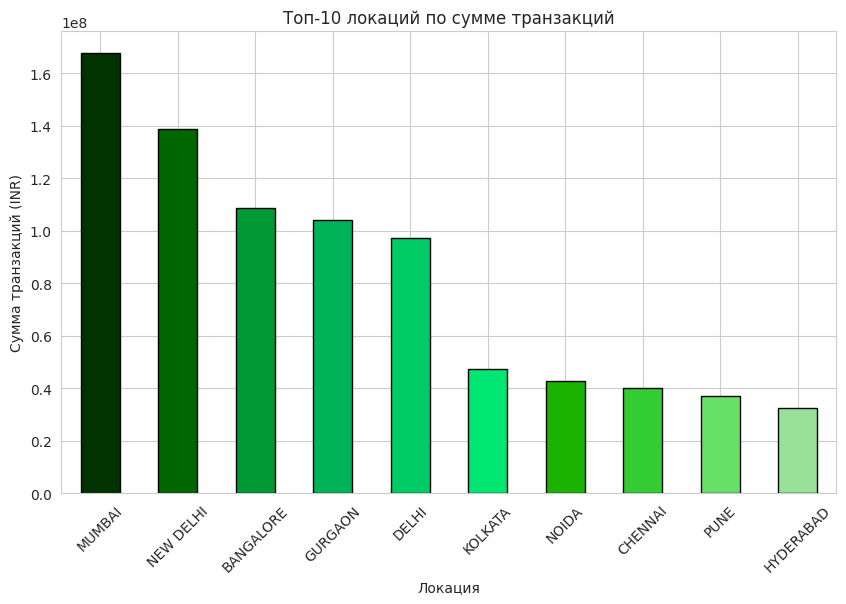

In [ ]:
# Подсчёт суммы транзакций по локации
transaction_sum_by_location = df_purified.groupby('custlocation')['transactionamount_(inr)'].sum()

# Выводим топ-10 локаций по сумме транзакций
top_10_locations_by_sum = transaction_sum_by_location.nlargest(10)

print("Топ-10 локаций по сумме транзакций:\n", top_10_locations_by_sum)

# Визуализация топ-10 локаций по сумме транзакций
plt.figure(figsize=(10, 6))
top_10_locations_by_sum.plot(kind='bar', color=colors, edgecolor='black')
plt.title("Топ-10 локаций по сумме транзакций")
plt.xlabel("Локация")
plt.ylabel("Сумма транзакций (INR)")
plt.xticks(rotation=45)
plt.show()


**Вывод о локации транзакций:**

---

Анализ сумм транзакций также подтверждает, что **MUMBAI** занимает лидирующую позицию, с разницей в почти 30 миллионов INR от **NEW DELHI**, что может указывать на более высокую платежеспособность клиентов в этом городе. Интересно, что GURGAON с суммой транзакций, близкой к **BANGALORE**, также демонстрирует значительную активность, что может быть связано с растущей экономикой и благоприятным деловым климатом в этом регионе.

**Рекомендации:**

**Маркетинговая стратегия:**
На основе полученных данных рекомендуется усилить маркетинговые активности в регионах с наибольшим количеством транзакций, особенно в MUMBAI и NEW DELHI, где существует значительный потенциал для роста.

**Анализ поведения клиентов:**
Понимание потребительских предпочтений в этих локациях может помочь в дальнейшем развитии продуктов и услуг, соответствующих требованиям целевой аудитории.

**Оптимизация логистики:**
Учитывая высокую транзакционную активность в определенных регионах, стоит рассмотреть возможности улучшения логистики и доставки товаров, чтобы удовлетворить растущий спрос.

Таким образом, данные о распределении транзакций по локациям предоставляют важные инсайты, которые могут быть использованы для оптимизации бизнес-процессов и повышения эффективности работы компании.

##12 . Распределение времени транзакции

Чтобы посмотреть распределение времени транзакций (в колонке TransactionTime), необходимо сначала перевести значения из миллисекунд в минуты, а затем построить график распределения.

- TransactionTime (Время транзаакции), переведем миллисекунды в формат времени.


**Пояснения**

df['transactiontime'] / 60000: преобразует время транзакции из миллисекунд в минуты, деля значение на 60,000.

**Гистограмма:** показывает, как распределены транзакции по времени в минутах, что позволяет визуально оценить, в какие временные интервалы происходят транзакции.
Эти шаги помогут вам проанализировать распределение времени транзакций, и результат будет понятен на графике.

Шаг 1: Перевод времени из миллисекунд в минуты
Для этого мы можем создать новую колонку, где значения будут преобразованы из миллисекунд в минуты.

Шаг 2: Построим гистограмму для отображения распределения времени транзакций в минутах.

0    143207
1    141858
2    142712
3    142714
4    181156
Name: transactiontime, dtype: int64
   transactiontime  transactiontime_minutes
0           143207                 2.386783
1           141858                 2.364300
2           142712                 2.378533
3           142714                 2.378567
4           181156                 3.019267


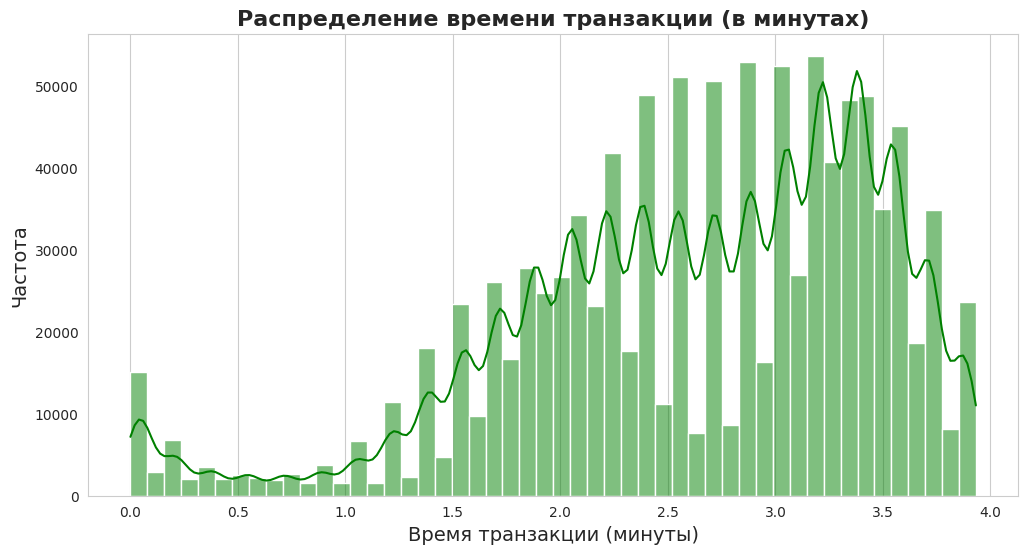

In [ ]:
# Загрузка данных
intermediate_path = '/content/drive/MyDrive/Курс Аналитик данных по Python от ZERO/PN14.Кейсы_в портфолио/Промежуточные/'
df_processed = pd.read_csv(intermediate_path + 'df_processed.csv', parse_dates=['customerdob', 'transactiondate'])

# Шаг 1: Проверяем тип данных
print(df_processed['transactiontime'].head())

# Шаг 2: Преобразуем transactiontime из миллисекунд в минуты
df_processed['transactiontime_minutes'] = df_processed['transactiontime'] / 60000

# Проверяем, как выглядят новые значения
print(df_processed[['transactiontime', 'transactiontime_minutes']].head())

# Шаг 3: Визуализируем распределение времени транзакции
plt.figure(figsize=(12, 6))
sns.histplot(df_processed['transactiontime_minutes'], bins=50, kde=True, color='green')  # Замените 'green' на нужный вам цвет из contrast_colors
plt.title('Распределение времени транзакции (в минутах)', fontsize=16, fontweight='bold')
plt.xlabel('Время транзакции (минуты)', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(axis='y')
plt.show()


**Выводы по распределению времени транзакции:**

**Среднее время транзакции :** Большинство транзакций занимает около 2-3 минут. Это может быть основанием для анализа эффективности обслуживания клиентов.

**Диапазон времени :** В представленных данных нет транзакций, занимающих более 3 минут, что может свидетельствовать о стабильной скорости обработки.



---


#**Раздел 4: Общие выводы и закономерности**

---


1. **Демографический анализ**
- **Преобладание мужчин**: В базе клиентов наблюдается значительное преобладание мужчин (72.4%). Это может указывать на необходимость разработки специальных программ и предложений для женщин, чтобы повысить их вовлеченность.
- **Возрастные группы**: Различия в платежеспособности между возрастными группами показывают, что старшие клиенты (46+) наиболее платежеспособны, в то время как молодежь (18-25) менее активна, несмотря на сравнительно высокую среднюю сумму транзакций.

2. **Географическое распределение**
- **Концентрация клиентов в крупных городах**: Mumbai, Bangalore и New Delhi являются основными центрами транзакционной активности, что подтверждает необходимость сосредоточения маркетинговых усилий в этих регионах.
- **Разница в платежеспособности**: Mumbai выделяется как наиболее активный рынок с наибольшими суммами транзакций, что может быть связано с экономической динамикой и более высоким уровнем доходов.

3. **Динамика транзакций**
- **Сезонность**: Данные о транзакциях показывают выраженные сезонные колебания, с пиковыми значениями в начале августа. Это может свидетельствовать о влиянии временных акций или скидок.
- **Снижение активности**: Наблюдается снижение транзакционной активности в определенные дни, что требует дальнейшего анализа причин, таких как завершение акций или изменение потребительских привычек.

4. **Анализ суммы транзакций**
- **Вариативность сумм**: Средняя сумма транзакций демонстрирует умеренную вариативность, с наибольшими значениями в выходные дни. Стандартное отклонение указывает на наличие как мелких, так и крупных транзакций, что требует внимания для выявления аномалий.
- **Наличие нулевых значений**: Выявленные нулевые суммы транзакций указывают на необходимость дополнительной проверки данных для устранения возможных ошибок.

5. **Эффективность обслуживания**
- **Среднее время транзакции**: Большинство транзакций занимает 2-3 минуты, что может свидетельствовать о стабильной скорости обработки и эффективности обслуживания клиентов. Отсутствие транзакций более 3 минут говорит о надежной системе обработки.

6. **Рекомендации по дальнейшим действиям**
- **Маркетинговые стратегии**: Разработка целевых маркетинговых кампаний для разных возрастных групп и географий, с акцентом на женщин и старшие возрастные группы, которые имеют высокую платежеспособность.
- **Анализ и оптимизация процессов**: Проведение дальнейших исследований для выявления причин колебаний в транзакционной активности и оптимизация логистики в высокоактивных регионах.

**Закономерности**

- **Связь между возрастом и платежеспособностью**: Чем старше клиент, тем выше средняя сумма его транзакций.
- **Влияние местоположения**: Большие города имеют более высокую концентрацию платежеспособных клиентов и активные транзакции.
- **Сезонные колебания**: Акции и распродажи оказывают значительное влияние на динамику транзакционной активности, что подчеркивает важность правильного планирования маркетинговых стратегий.

Эти выводы и закономерности предоставляют основу для формирования стратегий, направленных на увеличение клиентской базы, повышение уровня удовлетворенности клиентов и оптимизацию бизнес-процессов.